# **KNN i Regresja Logistyczna w Uczeniu Maszynowym**

![](https://datascientest.com/en/files/2021/01/Machine-learning-def-.png)



## **Wstęp**

Witaj na zajęciach dotyczących **algorytmów klasyfikacji** – kluczowych metod uczenia maszynowego do przewidywania kategorii i klas. W tym notebooku poznasz dwa fundamentalne algorytmy klasyfikacyjne: **K-Nearest Neighbors (KNN)** i **Regresję Logistyczną**.

Te algorytmy reprezentują różne podejścia do klasyfikacji:
- **KNN** to algorytm "leniwego uczenia", który podejmuje decyzje na podstawie podobieństwa do najbliższych sąsiadów
- **Regresja Logistyczna** to metoda parametryczna, która modeluje prawdopodobieństwo przynależności do klasy

Poznasz ich zasady działania, zalety, wady oraz praktyczne zastosowanie w rzeczywistych problemach klasyfikacyjnych.

### **Struktura notebooka**

Notebook zawiera objaśnienia teoretyczne oraz praktyczne przykłady w Pythonie. Po każdej sekcji znajdziesz **zadania do samodzielnego wykonania** oznaczone jako **Zadanie**. Zachęcam do aktywnego wykonywania tych ćwiczeń.

## **Różne Typy Zadań Klasyfikacyjnych**

W zależności od liczby klas i charakterystyki problemu, możemy wyróżnić różne typy zadań klasyfikacyjnych:

### **1. Klasyfikacja binarna (binary classification)**
Zadanie z **dwiema klasami**, często opisywane jako "pozytywna" (1) i "negatywna" (0).

**Przykłady:**
- 🔐 Czy klient spłaci kredyt? (tak/nie)
- 📧 Czy e-mail to spam? (spam/nie-spam)
- 🏥 Czy pacjent ma chorobę? (chory/zdrowy)
- 📈 Czy cena akcji wzrośnie? (wzrost/spadek)

**Matematycznie:** $y \in \{0, 1\}$

---

### **2. Klasyfikacja wieloklasowa (multiclass classification)**
Zadanie z **więcej niż dwiema klasami**, gdzie każda obserwacja należy do dokładnie jednej klasy.

**Przykłady:**
- 🌸 Rozpoznawanie gatunków kwiatów (Iris setosa, versicolor, virginica)
- 🚗 Klasyfikacja typów pojazdów (sedan, SUV, hatchback, pickup)
- 🎭 Analiza sentymentu (pozytywny, negatywny, neutralny)
- 🌍 Klasyfikacja krajów według regionów (Europa, Azja, Ameryka, Afrika)

**Matematycznie:** $y \in \{1, 2, 3, ..., K\}$ gdzie $K > 2$

---

### **3. Klasyfikacja wieloetykietowa (multilabel classification)**
Każda obserwacja może należeć do **więcej niż jednej klasy jednocześnie**.

**Przykłady:**
- 🏷️ Tagowanie artykułów prasowych (może być "sport" + "Europa" + "polityka")
- 🎬 Kategoryzacja filmów (może być "komedia" + "romans" + "familijny")
- 🔬 Diagnoza medyczna (pacjent może mieć kilka chorób jednocześnie)
- 📱 Klasyfikacja funkcji aplikacji (może być "produktywność" + "biznes" + "narzędzia")

**Matematycznie:** $y_i \in \{0, 1\}$ dla każdej klasy $i$, gdzie można mieć kilka klas = 1

![](https://miro.medium.com/v2/resize:fit:1400/1*E_vdCnhpHj6ZkrF7rUd5Qw.png)

## **📝 Zadanie: Rozpoznawanie typów problemów**

**Przyporządkuj każdy problem do odpowiedniego typu:**
- 🔄 **Regresja** 
- 📊 **Klasyfikacja binarna**
- 🎯 **Klasyfikacja wieloklasowa** 
- 🏷️ **Klasyfikacja wieloetykietowa**

### **Problemy do sklasyfikowania:**

1. **Przewidywanie cen akcji** na giełdzie w kolejnym dniu na podstawie historycznych cen, wolumenu obrotów i danych makroekonomicznych.

2. **Ocena ryzyka kredytowego:** Czy klient spłaci pożyczkę w terminie?

3. **Klasyfikacja gatunków owoców** (jabłko, gruszka, banan) na podstawie cech takich jak kolor, waga i średnica.

4. **Kategoryzacja filmów** na gatunki (komedia, dramat, kryminał) na podstawie opisu filmu - film może należeć do kilku gatunków jednocześnie.

5. **Przewidywanie sprzedaży produktu** w przyszłym miesiącu na podstawie ceny, sezonu, liczby recenzji i wydatków na reklamę.

6. **Klasyfikacja wiadomości e-mail** na spam lub nie-spam na podstawie słów kluczowych, nadawcy i tematu.

7. **Rozpoznawanie gatunków kwiatów** (setosa, versicolor, virginica) na podstawie wymiarów płatków i działek kielicha.

8. **Ocena ryzyka odejścia pracownika** z firmy (zostanie/odejdzie).

9. **Automatyczne tagowanie artykułów prasowych** (sport, Europa, polityka) - artykuł może mieć kilka tagów.

10. **Przewidywanie temperatury powietrza** w stopniach Celsjusza na kolejny dzień na podstawie historycznych danych pogodowych.

### **💡 Podpowiedzi:**
- Czy przewidujemy liczbę (wartość ciągłą) czy kategorię?
- Ile kategorii może być przypisanych jednocześnie?
- Czy kategorie się wykluczają?

# **K-Nearest Neighbors (KNN)**

## **Idea i Charakterystyka**

**KNN** to algorytm **"leniwego uczenia"** (lazy learning), który:

### **🔍 Jak działa KNN?**

1. **Wybieramy liczbę sąsiadów** $k$ (hiperparametr)
2. **Aby sklasyfikować nową obserwację**, szukamy $k$ najbliższych punktów z danych treningowych według wybranej metryki odległości
3. **Klasa najczęściej występująca** wśród tych $k$ sąsiadów jest przewidywaną klasą nowej obserwacji

### **📊 Matematyczne podstawy**

Dla nowej obserwacji $x_{new}$:

1. **Oblicz odległość** do wszystkich punktów treningowych:
   $$d(x_{new}, x_i) = \sqrt{\sum_{j=1}^{p} (x_{new,j} - x_{i,j})^2}$$

2. **Znajdź $k$ najbliższych sąsiadów**

3. **Przypisz klasę** na podstawie głosowania większości:
   $$\hat{y} = \arg\max_c \sum_{i \in N_k(x)} I(y_i = c)$$

gdzie $N_k(x)$ to zbiór $k$ najbliższych sąsiadów.

### **✅ Zalety KNN:**
- 🎯 **Intuicyjny i łatwy do zrozumienia**
- 🔄 **Nie wymaga trenowania** (lazy learning)
- 📈 **Działa dobrze dla lokalnych wzorców w danych**
- 🎪 **Może modelować złożone granice decyzyjne**
- 🏷️ **Naturalnie obsługuje klasyfikację wieloklasową**

### **❌ Wady KNN:**
- ⏱️ **Powolne predykcje** dla dużych zbiorów danych
- 💾 **Wymaga przechowywania wszystkich danych treningowych**
- 📏 **Bardzo czuły na skalę cech**
- 🔊 **Wrażliwy na szum w danych**
- 🌀 **Problemy z wysokowymiarowymi danymi** (curse of dimensionality)

### **🎨 Wizualizacja działania KNN**

![KNN Algorithm Visualization](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)

**Na powyższym obrazku:**
- 🟡 **Żółty pytajnik** = nowa obserwacja do sklasyfikowania
- 🔴 **Czerwone punkty** = klasa A z danych treningowych  
- 🟢 **Zielone punkty** = klasa B z danych treningowych
- ⭕ **Okrąg** = obszar zawierający k=3 najbliższych sąsiadów

**Wynik:** W okręgu mamy 1 czerwony i 2 zielone punkty, więc nowa obserwacja zostanie sklasyfikowana jako **klasa B** (zielona).

### **💡 Intuicja:** 
KNN działa na zasadzie **"powiedz mi, kim są twoi sąsiedzi, a powiem ci, kim jesteś"** – podobne obiekty prawdopodobnie należą do tej samej klasy.

## **⚙️ Hiperparametry i Dostrajanie KNN**

### **🎯 Kluczowy hiperparametr: $k$**

Wybór liczby sąsiadów $k$ to **najważniejsza decyzja** w KNN:

**🔄 Bias-Variance Tradeoff:**
- **Małe $k$ (np. k=1):**
  - ⬇️ **Niski bias** - model może uchwycić lokalne wzorce
  - ⬆️ **Wysoka wariancja** - wrażliwy na szum, ryzyko overfittingu
  - 🎯 **Złożone granice decyzyjne**

- **Duże $k$ (np. k=√n):**
  - ⬆️ **Wyższy bias** - model może być zbyt uproszczony  
  - ⬇️ **Niższa wariancja** - bardziej stabilny
  - 📊 **Gładsze granice decyzyjne**, ryzyko underfittingu

### **📏 Metryki odległości**

**1. Odległość Euklidesowa (domyślna):**
$$d_{euclidean}(x,y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

**2. Odległość Manhattan (L1):**
$$d_{manhattan}(x,y) = \sum_{i=1}^{n} |x_i - y_i|$$

**3. Odległość Minkowskiego:**
$$d_{minkowski}(x,y) = \left(\sum_{i=1}^{n} |x_i - y_i|^p\right)^{1/p}$$

### **⚖️ Ważenie sąsiadów**

- **Uniform:** Wszyscy sąsiedzi mają równą wagę
- **Distance:** Bliżsi sąsiedzi mają większą wagę:
  $$w_i = \frac{1}{d_i + \epsilon}$$

### **📊 Skalowanie cech - KRYTYCZNE!**

KNN **WYMAGA** skalowania, ponieważ:
```
Przykład bez skalowania:
- Wiek: 25 lat
- Dochód: 50,000 PLN  
- Edukacja: 16 lat

Odległość zdominowana przez dochód!
```

**Metody skalowania:**
- **StandardScaler:** $(x - \mu) / \sigma$
- **MinMaxScaler:** $(x - x_{min}) / (x_{max} - x_{min})$
- **RobustScaler:** Odporny na outliers

## **🔍 Jak Dobierać Hiperparametry w KNN?**

### **📈 Strategie optymalizacji**

**1. 🔄 Walidacja krzyżowa (Cross-Validation):**
- Dzielimy zbiór treningowy na $k$ części (folds)
- Trenujemy i testujemy na różnych kombinacjach
- Wybieramy hiperparametry dające najlepszą średnią jakość

**2. 🔍 Grid Search:**
```python
k_values = [1, 3, 5, 7, 9, 11, 15, 21]
metrics = ['euclidean', 'manhattan', 'minkowski']
weights = ['uniform', 'distance']
```

**3. 🎲 Random Search:**
- Losowo próbkuje przestrzeń hiperparametrów
- Często skuteczniejszy niż Grid Search dla dużych przestrzeni

### **📊 Praktyczne wskazówki doboru $k$:**

**🧮 Reguły praktyczne:**
- **Małe zbiory:** $k = 3$ do $7$
- **Średnie zbiory:** $k = \sqrt{n}$ gdzie $n$ = liczba próbek
- **Duże zbiory:** $k = \sqrt{n}$ do $n/10$

**📈 Obserwacja krzywych uczenia:**
- Płynny wzrost accuracy → zwiększ $k$
- Nagły spadek accuracy → zmniejsz $k$
- Plateau → optymalne $k$

**⚖️ Uwagi:**
- $k$ powinno być **nieparzyste** dla klasyfikacji binarnej (unikanie remisów)
- Testuj zawsze szeroki zakres wartości
- Różne problemy wymagają różnych $k$

### **🎯 Przykładowy workflow:**

1. **Przygotuj dane:** skalowanie, podział train/validation/test
2. **Określ zakres $k$:** np. [1, 3, 5, 7, 9, 11, 15, 21, 31]
3. **Zastosuj CV:** 5-fold lub 10-fold cross-validation  
4. **Wybierz metrykę:** accuracy, F1-score, ROC-AUC
5. **Porównaj wyniki:** wybierz $k$ z najlepszą średnią
6. **Walidacja finalna:** testuj na niezależnym zbiorze testowym

# **Regresja Logistyczna**

## **Podstawy i Interpretacja**

Regresja logistyczna to **liniowy model klasyfikacyjny**, który mimo nazwy służy do klasyfikacji, nie regresji. Jest to jeden z najważniejszych algorytmów w machine learning.

### **🎯 Kluczowa idea**

Zamiast przewidywać klasę bezpośrednio, regresja logistyczna **modeluje prawdopodobieństwo** przynależności do klasy:

$$P(y=1|X) = \sigma(\beta_0 + \beta_1 x_1 + ... + \beta_n x_n)$$

### **📊 Funkcja Sigmoidalna (Logistyczna)**

$$\sigma(z) = \frac{1}{1+e^{-z}} = \frac{e^z}{1+e^z}$$

gdzie $z = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n$ (kombinacja liniowa cech)

**🔄 Właściwości funkcji sigmoidalnej:**
- **Zakres:** $(0, 1)$ - idealne dla prawdopodobieństw
- **Kształt:** S-kształtna krzywa
- **Punkt przegięcia:** $z = 0$ → $\sigma(0) = 0.5$
- **Monotoniczność:** im większe $z$, tym większe prawdopodobieństwo

### **⚖️ Próg decyzyjny**

**Standardowy próg:** $P(y=1|X) > 0.5$ → przewidujemy klasę 1

**Alternatywnie:** Możemy dostosować próg według potrzeb biznesowych:
- **Konserwatywny:** próg = 0.8 (mniej fałszywych alarmów)
- **Liberalny:** próg = 0.3 (mniej pominiętych przypadków)

### **🎨 Interpretacja współczynników**

**Współczynnik $\beta_i$** informuje o wpływie cechy $x_i$:

- $\beta_i > 0$: cecha **zwiększa** prawdopodobieństwo klasy 1
- $\beta_i < 0$: cecha **zmniejsza** prawdopodobieństwo klasy 1  
- $|\beta_i|$ duże: cecha ma **silny wpływ**
- $|\beta_i|$ małe: cecha ma **słaby wpływ**

**Iloraz szans (Odds Ratio):** $OR_i = e^{\beta_i}$
- $OR_i = 2$: zwiększenie cechy o 1 podwaja szanse na klasę 1
- $OR_i = 0.5$: zwiększenie cechy o 1 zmniejsza szanse o połowę

### **📈 Wizualizacja funkcji sigmoidalnej**

![Logistic Function](https://i.ibb.co/vk9p32T/Untitled.png)

**Kluczowe punkty:**
- 📍 **z = 0:** $P = 0.5$ (punkt neutralny)
- 📈 **z > 0:** $P > 0.5$ (skłonność ku klasie 1) 
- 📉 **z < 0:** $P < 0.5$ (skłonność ku klasie 0)
- ♾️ **z → +∞:** $P → 1$ (pewność klasy 1)
- ♾️ **z → -∞:** $P → 0$ (pewność klasy 0)

### **✅ Zalety Regresji Logistycznej:**
- 🚀 **Szybka i efektywna** - niski koszt obliczeniowy
- 📊 **Probabilistyczne wyjście** - nie tylko klasę, ale i prawdopodobieństwo
- 🔍 **Wysoka interpretowalność** - jasne znaczenie współczynników
- 🎯 **Dobra dla problemów liniowo separowalnych**
- 📈 **Stabilny algorytm** - rzadko problemy z konwergencją
- 🔄 **Naturalnie obsługuje klasyfikację wieloklasową** (one-vs-rest)

### **❌ Wady Regresji Logistycznej:**
- 📏 **Wymaga liniowej separowalności** - problemy z nielinearnymi wzorcami
- 🔊 **Wrażliwa na outliers** w przestrzeni cech
- 📊 **Może wymagać feature engineering** dla złożonych relacji
- ⚖️ **Potrzebuje regularyzacji** przy dużej liczbie cech
- 📉 **Słaba dla silnie niezbalansowanych danych**

## **⚙️ Hiperparametry w Regresji Logistycznej**

### **🎯 Główny hiperparametr: $C$ (siła regularyzacji)**

W scikit-learn regularyzację kontroluje parametr $C$:

$$C = \frac{1}{\lambda}$$

gdzie $\lambda$ to tradycyjny parametr regularyzacji.

**📊 Wpływ parametru $C$:**

**🔥 Duże $C$ (np. C = 100):**
- ⬇️ **Słaba regularyzacja** ($\lambda$ małe)
- 🎯 **Model może dopasować się ściślej** do danych treningowych
- ⚠️ **Ryzyko overfittingu** - szczególnie przy dużej liczbie cech
- 📈 **Wyższe prawdopodobieństwo uzyskania wysokiej accuracy na zbiorze treningowym**

**❄️ Małe $C$ (np. C = 0.01):**  
- ⬆️ **Silna regularyzacja** ($\lambda$ duże)
- 🛡️ **Współczynniki trzymane w ryzach** - mniejsze wartości $|\beta_i|$
- 🔄 **Zapobiega overfittingowi**
- ⚠️ **Ryzyko underfittingu** - model może być zbyt uproszczony

### **🧮 Rodzaje regularyzacji**

**1. 🅻1️⃣ Regularyzacja L1 (Lasso):**
$$J = -\log L + \lambda \sum_{i=1}^n |\beta_i|$$

✅ **Zalety:**
- 🎯 **Automatyczna selekcja cech** - zeruje nieistotne współczynniki
- 📊 **Tworzy rzadkie modele** (sparse models)
- 🔍 **Lepsze dla interpretacji** - mniej cech w finalnym modelu

❌ **Wady:**
- 🎲 **Losowy wybór** spośród skorelowanych cech
- 📉 **Może usunąć ważne cechy**

**2. 🅻2️⃣ Regularyzacja L2 (Ridge) - domyślna:**
$$J = -\log L + \lambda \sum_{i=1}^n \beta_i^2$$

✅ **Zalety:**
- 🛡️ **Stabilna** - nie zeruje współczynników całkowicie
- 📊 **Dobrze radzi sobie ze skorelowanymi cechami**
- 🎯 **Zazwyczaj lepsza wydajność predykcyjna**

❌ **Wady:**  
- 🔄 **Nie wykonuje selekcji cech** - wszystkie cechy pozostają
- 🤔 **Trudniejsza interpretacja** przy dużej liczbie cech

**3. 🔄 Elastic Net (L1 + L2):**
$$J = -\log L + \lambda_1 \sum_{i=1}^n |\beta_i| + \lambda_2 \sum_{i=1}^n \beta_i^2$$

Kompromis między L1 i L2.

### **🔧 Inne ważne hiperparametry**

**4. 🛠️ Solver (algorytm optymalizacji):**

| Solver | Cechy | Kiedy używać |
|--------|-------|--------------|
| `liblinear` | 📊 Dobry dla małych zbiorów | < 10,000 próbek, L1/L2 |
| `lbfgs` | 🚀 Szybki, domyślny | Średnie zbiory, tylko L2 |
| `saga` | 🔄 Obsługuje wszystkie penalty | Duże zbiory, L1/L2/ElasticNet |
| `newton-cg` | 🎯 Precyzyjny | Średnie zbiory, tylko L2 |
| `sag` | ⚡ Stochastic Average Gradient | Duże zbiory, tylko L2 |

**5. ⚖️ Class_weight (wagi klas):**
- `None`: Wszystkie klasy równe
- `balanced`: Automatyczne wyważenie na podstawie częstości klas
- `dict`: Własne wagi, np. `{0: 1, 1: 3}` (klasa 1 ma 3x większą wagę)

**6. 🎯 Max_iter (maksymalna liczba iteracji):**
- Domyślnie: 100
- Zwiększ jeśli model nie konwerguje
- Typowy zakres: 100-1000

### **📊 Solver selection guide:**

```python
# Mały zbiór (< 10k próbek) + L1/L2
LogisticRegression(solver='liblinear', penalty='l1')

# Średni zbiór + L2 (domyślny, najczęstszy)
LogisticRegression(solver='lbfgs', penalty='l2')

# Duży zbiór + L1/L2/ElasticNet
LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5)
```

## **🔍 Dobór Hiperparametrów w Regresji Logistycznej**

### **🎯 Strategia optymalizacji**

**1. 📋 Określ przestrzeń wyszukiwania:**
```python
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}
```

**2. 🔄 Zastosuj walidację krzyżową:**
- **5-fold CV** dla średnich zbiorów
- **10-fold CV** dla małych zbiorów  
- **StratifiedKFold** dla niezbalansowanych klas

**3. 📊 Wybierz odpowiednią metrykę:**
- **Accuracy**: Gdy klasy są zbalansowane
- **F1-score**: Gdy klasy są niezbalansowane
- **ROC-AUC**: Gdy zależy na rankingu prawdopodobieństw
- **Precision/Recall**: Gdy jeden typ błędu jest krytyczny

### **⚖️ Praktyczne wskazówki:**

**🎯 Problemy biznesowe:**
- **Selekcja cech**: Użyj L1 penalty
- **Stabilność predykcji**: Użyj L2 penalty
- **Niezbalansowane klasy**: Ustaw `class_weight='balanced'`
- **Duże zbiory**: Użyj `solver='saga'`

**📈 Monitoring:**
- Obserwuj krzywe uczenia
- Sprawdzaj czas wykonania
- Monitoruj konwergencję (warning messages)

### **🔄 Przykładowy workflow:**

1. **Baseline model:** Domyślne parametry
2. **Quick scan:** Szerokie zakresy C = [0.01, 1, 100]
3. **Fine tuning:** Wąskie zakresy wokół optimum
4. **Final validation:** Test na niezależnym zbiorze

**⚠️ Częste pułapki:**
- **Overfitting na CV:** Zbyt dużo iteracji grid search
- **Data leakage:** Skalowanie przed podziałem train/test
- **Ignorowanie business context:** Metryka nie odpowiada celowi biznesowemu

# **Metryki Oceny Jakości Klasyfikacji**

## **🎯 Kluczowe metryki dla klasyfikacji**

Po wybraniu modelu i hiperparametrów musimy go rzetelnie ocenić. Różne metryki pokazują różne aspekty wydajności modelu.

### **📊 Macierz konfuzji - fundament ewaluacji**

|               | Predicted 0 | Predicted 1 |
|---------------|------------|------------|
| **Actual 0**  | TN         | FP         |
| **Actual 1**  | FN         | TP         |

**Oznaczenia:**
- **TP (True Positive)**: Poprawnie przewidziane pozytywne
- **TN (True Negative)**: Poprawnie przewidziane negatywne  
- **FP (False Positive)**: Błędnie przewidziane pozytywne (Type I error)
- **FN (False Negative)**: Błędnie przewidziane negatywne (Type II error)

### **📏 Podstawowe metryki**

**1. 🎯 Accuracy (dokładność):**
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

✅ **Kiedy używać:** Zbalansowane klasy  
❌ **Unikaj gdy:** Niezbalansowane klasy (może być myląca!)

**Przykład:** 95% accuracy brzmi dobrze, ale jeśli 95% próbek to klasa 0, model może zawsze przewidywać 0!

**2. 🎯 Precision (precyzja):**
$$\text{Precision} = \frac{TP}{TP + FP}$$

**Interpretacja:** "Ile z przewidzianych pozytywów jest faktycznie pozytywnych?"

✅ **Kiedy krytyczna:** Gdy fałszywe alarmy są kosztowne  
🏥 **Przykład:** Diagnoza raka - nie chcemy niepotrzebnie martwić zdrowych pacjentów

**3. 🔍 Recall (czułość, sensitivity):**
$$\text{Recall} = \frac{TP}{TP + FN}$$

**Interpretacja:** "Ile z rzeczywistych pozytywów wykrywamy?"

✅ **Kiedy krytyczna:** Gdy przegapienie przypadku jest kosztowne  
🚨 **Przykład:** Detekcja oszustw - nie możemy przegapić żadnego oszustwa

**4. ⚖️ F1-score (harmoniczna średnia):**
$$\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

✅ **Kiedy używać:** Chcemy zbalansować precision i recall  
🎯 **Zaleta:** Jedna metryka uwzględniająca oba aspekty

### **📈 Zaawansowane metryki**

**5. 🎪 Specificity (swoistość):**
$$\text{Specificity} = \frac{TN}{TN + FP}$$

**Interpretacja:** "Ile z rzeczywistych negatywów prawidłowo identyfikujemy?"

**6. 📊 ROC-AUC (Area Under Curve):**
- **ROC Curve:** Krzywa Precision vs Recall dla różnych progów
- **AUC ∈ [0,1]:** Im bliżej 1, tym lepszy model
- **AUC = 0.5:** Model losowy
- **AUC > 0.8:** Dobry model
- **AUC > 0.9:** Doskonały model

✅ **Zalety:** Niezależna od progu decyzyjnego, dobra dla rankingu  
❌ **Wady:** Może być myląca dla bardzo niezbalansowanych danych

**7. 📏 Log-loss (Cross-entropy):**
$$\text{Log-loss} = -\frac{1}{n}\sum_{i=1}^{n}[y_i \log(p_i) + (1-y_i)\log(1-p_i)]$$

✅ **Zaleta:** Uwzględnia pewność predykcji, nie tylko klasę  
🎯 **Kiedy używać:** Gdy ważne są prawdopodobieństwa, nie tylko klasyfikacja

### **🎯 Wybór metryki według problemu biznesowego**

| Problem | Priorytet | Metryka |
|---------|-----------|---------|
| 🏥 Diagnoza medyczna | Nie przegap choroby | **Recall** |
| 📧 Filtr spamu | Nie blokuj ważnych maili | **Precision** |
| 🔍 Wyszukiwarka | Balans trafności | **F1-score** |
| 📊 Ranking produktów | Porządek ważny | **ROC-AUC** |
| 💰 Model biznesowy | Koszty błędów | **Custom metric** |

### **⚖️ Precision-Recall Tradeoff**

**📈 Zwiększając próg decyzyjny:**
- ⬆️ **Precision rośnie** (mniej fałszywych alarmów)
- ⬇️ **Recall spada** (więcej przegapionych przypadków)

**📉 Zmniejszając próg decyzyjny:**
- ⬇️ **Precision spada** (więcej fałszywych alarmów)  
- ⬆️ **Recall rośnie** (mniej przegapionych przypadków)

**🎯 Optimalny próg:** Zależy od kosztu błędów typu I vs II w kontekście biznesowym.

# **Wskazówki Praktyczne i Best Practices**

## **🛠️ Przygotowanie danych**

### **📏 Skalowanie - KRYTYCZNE dla KNN, ważne dla LR**

**❌ Bez skalowania:**
```
Wiek: 25 lat
Dochód: 50,000 PLN
Wykształcenie: 16 lat
```
KNN będzie zdominowane przez dochód (najwyższe wartości)!

**✅ Ze skalowaniem:**
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

**🎯 Kiedy którą metodę:**
- **StandardScaler:** Dane normalne, obecność outliers OK
- **MinMaxScaler:** Dane równomiernie rozłożone, znany zakres
- **RobustScaler:** Dużo outliers, mediany zamiast średnich

### **🔄 Podział danych - strategia**

```python
# 1. Najpierw podział train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Potem skalowanie (unikaj data leakage!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # tylko transform!
```

⚠️ **NIGDY nie rób fit na całych danych przed podziałem!**

## **🎯 Wybór modelu - decision tree**

### **📊 KNN vs Regresja Logistyczna**

| Cecha | KNN | Logistic Regression |
|-------|-----|-------------------|
| 🏃 **Szybkość treningu** | Błyskawiczny | Szybka |
| ⚡ **Szybkość predykcji** | Wolna | Błyskawiczna |
| 🔍 **Interpretowalność** | Niska | Wysoka |
| 📏 **Wymagania skalowania** | Krytyczne | Zalecane |
| 🌀 **Nieliniowe wzorce** | Doskonała | Słaba |
| 📊 **Wysokie wymiary** | Problematyczna | Dobra |
| 💾 **Zużycie pamięci** | Wysokie | Niskie |
| 🎯 **Probabilistic output** | Możliwe | Naturalne |

### **🎯 Kiedy wybrać który algorytm?**

**🔵 Wybierz KNN gdy:**
- 📊 Masz lokalnie separowalne klasy
- 🌀 Potrzebujesz modelować złożone, nieliniowe granice
- 💾 Zbiór danych nie jest ogromny (< 100k próbek)
- 🎯 Nie potrzebujesz interpretacji modelu
- ⚡ Predykcja w czasie rzeczywistym nie jest krytyczna

**🟡 Wybierz Regresję Logistyczną gdy:**
- 🔍 Potrzebujesz interpretować model i współczynniki
- ⚡ Szybkość predykcji jest krytyczna
- 📈 Masz duży zbiór danych (> 100k próbek)
- 💰 Niski koszt obliczeniowy jest ważny
- 📊 Potrzebujesz prawdopodobieństwa, nie tylko klas
- 🎯 Problem jest w miarę liniowo separowalny


### **⚠️ Częste błędy i jak ich uniknąć**

**🚫 Data Leakage:**
```python
# ❌ ŹLE - skalowanie przed podziałem
X_scaled = scaler.fit_transform(X)
X_train, X_test = train_test_split(X_scaled)

# ✅ DOBRZE - skalowanie po podziale
X_train, X_test = train_test_split(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # tylko transform!
```

**🚫 Overfitting na CV:**
```python
# ❌ ŹLE - zbyt dużo iteracji grid search
# Można "wyuczyć" optymalne parametry dla konkretnego CV split

# ✅ DOBRZE - reasonable grid, nested CV dla krytycznych projektów
```

**🚫 Niewłaściwa metryka:**
```python
# ❌ ŹLE - accuracy dla niezbalansowanych klas
# 95% accuracy może oznaczać, że model zawsze przewiduje klasę większościową

# ✅ DOBRZE - F1, ROC-AUC, lub custom metric
```

# **Case Study: Przewidywanie Cukrzycy**

## **📋 Opis Problemu Biznesowego**

Jako **data scientist w szpitalu**, otrzymujesz zadanie stworzenia systemu wczesnego wykrywania cukrzycy u pacjentek. System ma pomagać lekarzom w:

🎯 **Cele biznesowe:**
- 🏥 **Wczesna diagnoza** - identyfikacja pacjentek zagrożonych cukrzycą  
- 💰 **Redukcja kosztów** - prewencja zamiast leczenia zaawansowanej choroby
- ⚡ **Szybka ocena** - wykorzystanie rutynowych badań bez dodatkowych testów
- 🎯 **Personalizacja opieki** - dostosowanie programów profilaktycznych

## **📊 Opis Danych - Pima Indians Diabetes Dataset**

Dataset pochodzi z badań **National Institute of Diabetes and Digestive and Kidney Diseases** przeprowadzonych wśród kobiet pochodzenia indiańskiego Pima - populacji o wysokim ryzyku cukrzycy.

### **📈 Podstawowe informacje:**
- **👥 Liczba próbek:** 768 pacjentek
- **📊 Liczba cech:** 8 cech predykcyjnych + 1 zmienna docelowa
- **🎯 Typ problemu:** Klasyfikacja binarna (cukrzyca: tak/nie)
- **⚖️ Balans klas:** ~35% pozytywnych przypadków (niezbalansowane)

### **🔬 Szczegółowy opis cech:**

| Cecha | Opis | Jednostka | Wartości typowe |
|-------|------|-----------|-----------------|
| **Pregnancies** | Liczba ciąż pacjentki | liczba | 0-17 |
| **Glucose** | Poziom glukozy we krwi (test tolerancji glukozy) | mg/dL | 44-199 |
| **BloodPressure** | Ciśnienie rozkurczowe | mmHg | 24-122 |
| **SkinThickness** | Grubość fałdu skórnego tricepsa | mm | 7-99 |
| **Insulin** | Poziom insuliny w surowicy (2h po teście) | μU/mL | 14-846 |
| **BMI** | Indeks masy ciała | kg/m² | 18.2-67.1 |
| **DiabetesPedigreeFunction** | Funkcja predyspozycji genetycznej | - | 0.078-2.42 |
| **Age** | Wiek pacjentki | lata | 21-81 |
| **Outcome** | Diagnoza cukrzycy (zmienna docelowa) | 0/1 | 0=zdrowa, 1=cukrzyca |

### **⚠️ Wyzwania w danych:**
- **Brakujące wartości** ukryte jako zera (szczególnie: ciśnienie, grubość skóry, insulina)
- **Outliers** w niektórych pomiarach medycznych
- **Korelacje** między niektórymi cechami (BMI vs grubość skóry)
- **Bias populacyjny** - tylko kobiety pochodzenia indiańskiego Pima

### **🎯 Kontekst medyczny:**
- **Glucose > 125 mg/dL:** Wskazuje na cukrzycę
- **BMI > 30:** Otyłość - czynnik ryzyka cukrzycy
- **Wiek:** Ryzyko wzrasta z wiekiem  
- **Ciąże:** Cukrzyca ciążowa zwiększa ryzyko cukrzycy typu 2
- **Genetyka:** Historia rodzinna (DiabetesPedigreeFunction) kluczowa


## Tutaj zastostujemy wszystko krok po kroku dla lepszego zrozumienia tematu, natomiast na koniec będzie można skorzystac z obiektu `Pipe` aby połączyć to w jeden potok od danych wejściowych do treningu/predykcji

In [1]:
# ===================================================================
# 📦 IMPORT NIEZBĘDNYCH BIBLIOTEK
# ===================================================================

# Podstawowe biblioteki do analizy danych
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienia wizualizacji
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Biblioteki do uczenia maszynowego
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Metryki ewaluacji
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, precision_recall_curve
)

# Dodatki do wizualizacji
from sklearn.metrics import confusion_matrix, roc_curve
import warnings
warnings.filterwarnings('ignore')

print("✅ Wszystkie biblioteki zaimportowane pomyślnie!")
print("🎯 Gotowi do analizy predykcji cukrzycy!")

✅ Wszystkie biblioteki zaimportowane pomyślnie!
🎯 Gotowi do analizy predykcji cukrzycy!


In [2]:
# ===================================================================
# 📊 WCZYTANIE I PODSTAWOWE INFORMACJE O DANYCH
# ===================================================================

# Wczytanie dataset'u cukrzycy
print("🔍 Wczytywanie danych...")
df = pd.read_csv('datasets/diabetes.csv')

print(f"✅ Dataset wczytany pomyślnie!")
print(f"📊 Wymiary danych: {df.shape[0]} wierszy × {df.shape[1]} kolumn")
print(f"🎯 Zmienne: {list(df.columns)}")

🔍 Wczytywanie danych...
✅ Dataset wczytany pomyślnie!
📊 Wymiary danych: 768 wierszy × 9 kolumn
🎯 Zmienne: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [3]:
# ===================================================================
# 🔍 EKSPLORACJA DANYCH (EDA)
# ===================================================================

print("=" * 60)
print("📋 PODSTAWOWE INFORMACJE O DATASECIE")
print("=" * 60)

# Podstawowe informacje o danych
print("\n🔍 Struktura danych:")
print(df.info())

📋 PODSTAWOWE INFORMACJE O DATASECIE

🔍 Struktura danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
print("\n📊 Statystyki opisowe:")
print(df.describe().round(2))

print("\n📈 Pierwsze 5 wierszy danych:")
print(df.head())


📊 Statystyki opisowe:
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       768.00   768.00         768.00         768.00   768.00  768.00   
mean          3.85   120.89          69.11          20.54    79.80   31.99   
std           3.37    31.97          19.36          15.95   115.24    7.88   
min           0.00     0.00           0.00           0.00     0.00    0.00   
25%           1.00    99.00          62.00           0.00     0.00   27.30   
50%           3.00   117.00          72.00          23.00    30.50   32.00   
75%           6.00   140.25          80.00          32.00   127.25   36.60   
max          17.00   199.00         122.00          99.00   846.00   67.10   

       DiabetesPedigreeFunction     Age  Outcome  
count                    768.00  768.00   768.00  
mean                       0.47   33.24     0.35  
std                        0.33   11.76     0.48  
min                        0.08   21.00     0.00  
25%                

In [5]:
print("\n" + "=" * 60)
print("🎯 ANALIZA ZMIENNEJ DOCELOWEJ")
print("=" * 60)

# Sprawdź rozkład zmiennej docelowej (Outcome)
outcome_counts = df['Outcome'].value_counts()
outcome_percentage = df['Outcome'].value_counts(normalize=True) * 100

print(f"\n📊 Rozkład przypadków cukrzycy:")
print(f"🟢 Zdrowe pacjentki (0): {outcome_counts[0]} ({outcome_percentage[0]:.1f}%)")
print(f"🔴 Pacjentki z cukrzycą (1): {outcome_counts[1]} ({outcome_percentage[1]:.1f}%)")

if outcome_percentage[1] < 40:
    print(f"⚠️  UWAGA: Dataset jest niezbalansowany - tylko {outcome_percentage[1]:.1f}% pozytywnych przypadków!")
    print("💡 Rozważ użycie odpowiednich metryk (F1, ROC-AUC) i technik balansowania.")


🎯 ANALIZA ZMIENNEJ DOCELOWEJ

📊 Rozkład przypadków cukrzycy:
🟢 Zdrowe pacjentki (0): 500 (65.1%)
🔴 Pacjentki z cukrzycą (1): 268 (34.9%)
⚠️  UWAGA: Dataset jest niezbalansowany - tylko 34.9% pozytywnych przypadków!
💡 Rozważ użycie odpowiednich metryk (F1, ROC-AUC) i technik balansowania.


In [6]:
print("\n" + "=" * 60)
print("📊 WIZUALIZACJA ROZKŁADÓW ZMIENNYCH")
print("=" * 60)

# Definiowanie zmiennych numerycznych
num_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

print(f"📈 Generowanie histogramów dla {len(num_cols)} zmiennych numerycznych...")


📊 WIZUALIZACJA ROZKŁADÓW ZMIENNYCH
📈 Generowanie histogramów dla 8 zmiennych numerycznych...


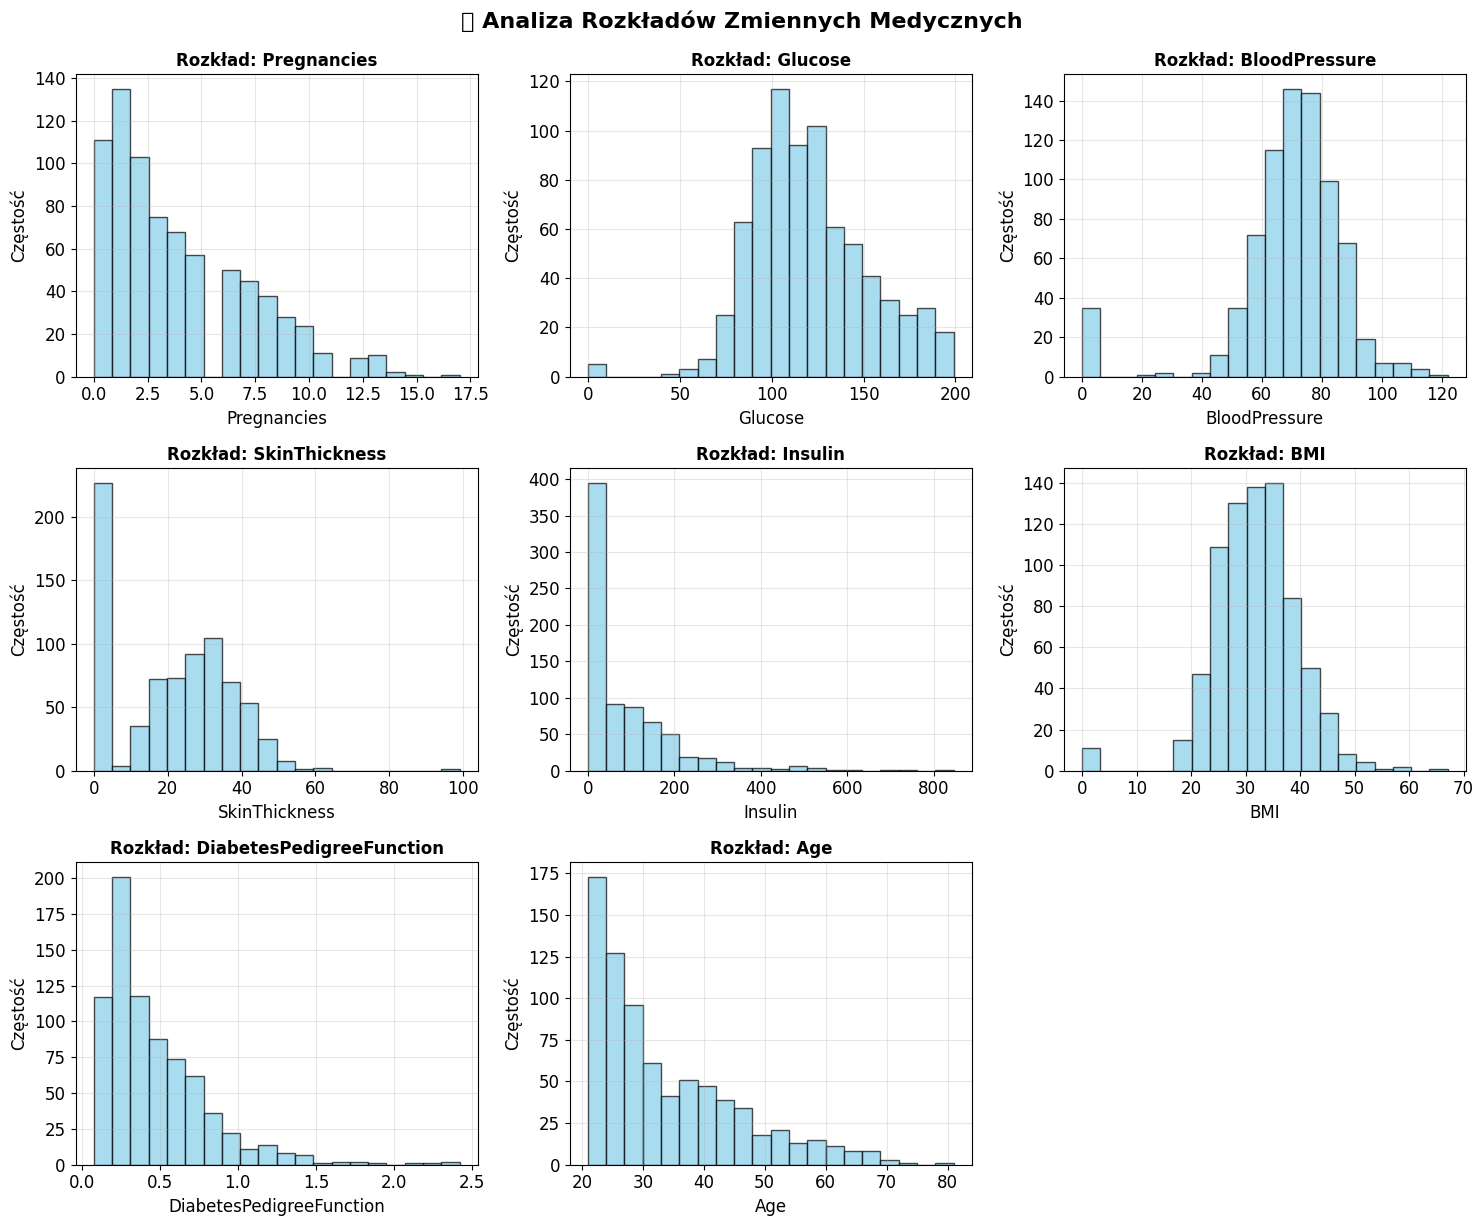

✅ Histogramy wygenerowane!
💡 Zwróć uwagę na zmienne z wartościami 0, które mogą być brakami danych.


In [7]:
# Histogramy każdej zmiennej z ulepszoną prezentacją
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(num_cols):
    axes[idx].hist(df[col], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Rozkład: {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Częstość')
    axes[idx].grid(True, alpha=0.3)

# Usuń ostatni pusty subplot
axes[-1].remove()

plt.tight_layout()
plt.suptitle('🔍 Analiza Rozkładów Zmiennych Medycznych', fontsize=16, fontweight='bold', y=1.02)
plt.show()

print("✅ Histogramy wygenerowane!")
print("💡 Zwróć uwagę na zmienne z wartościami 0, które mogą być brakami danych.")

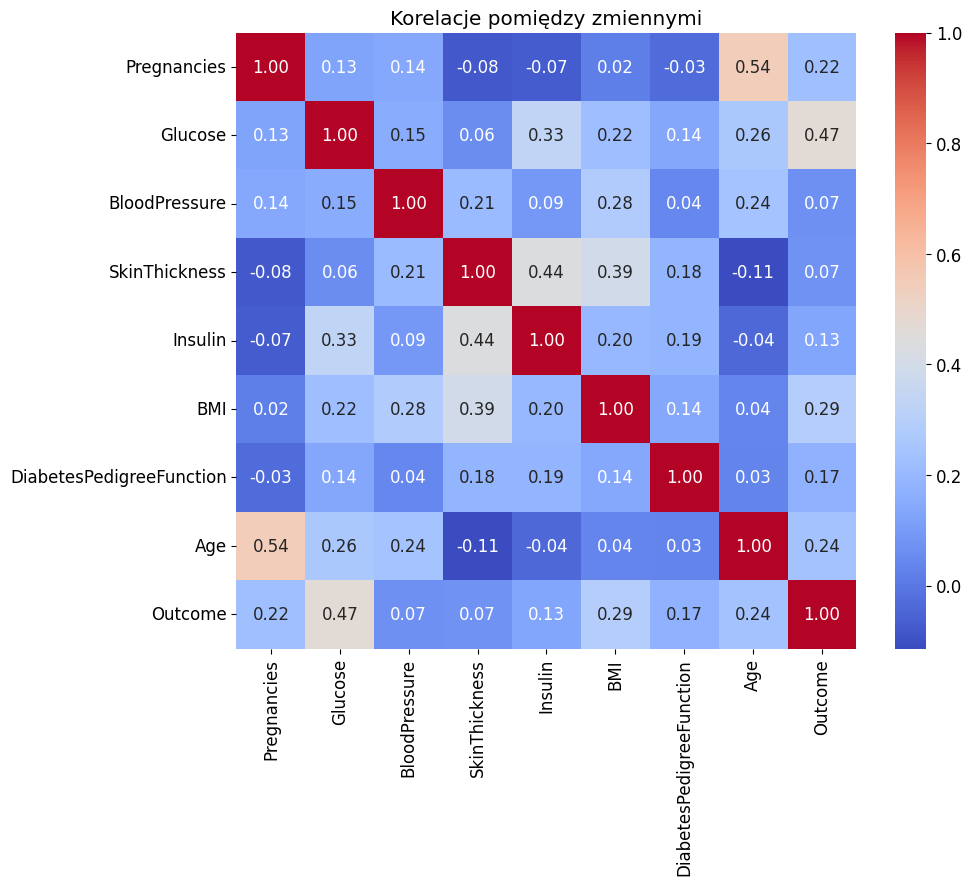

In [8]:


# Korelacja pomiędzy zmiennymi
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelacje pomiędzy zmiennymi')
plt.show()

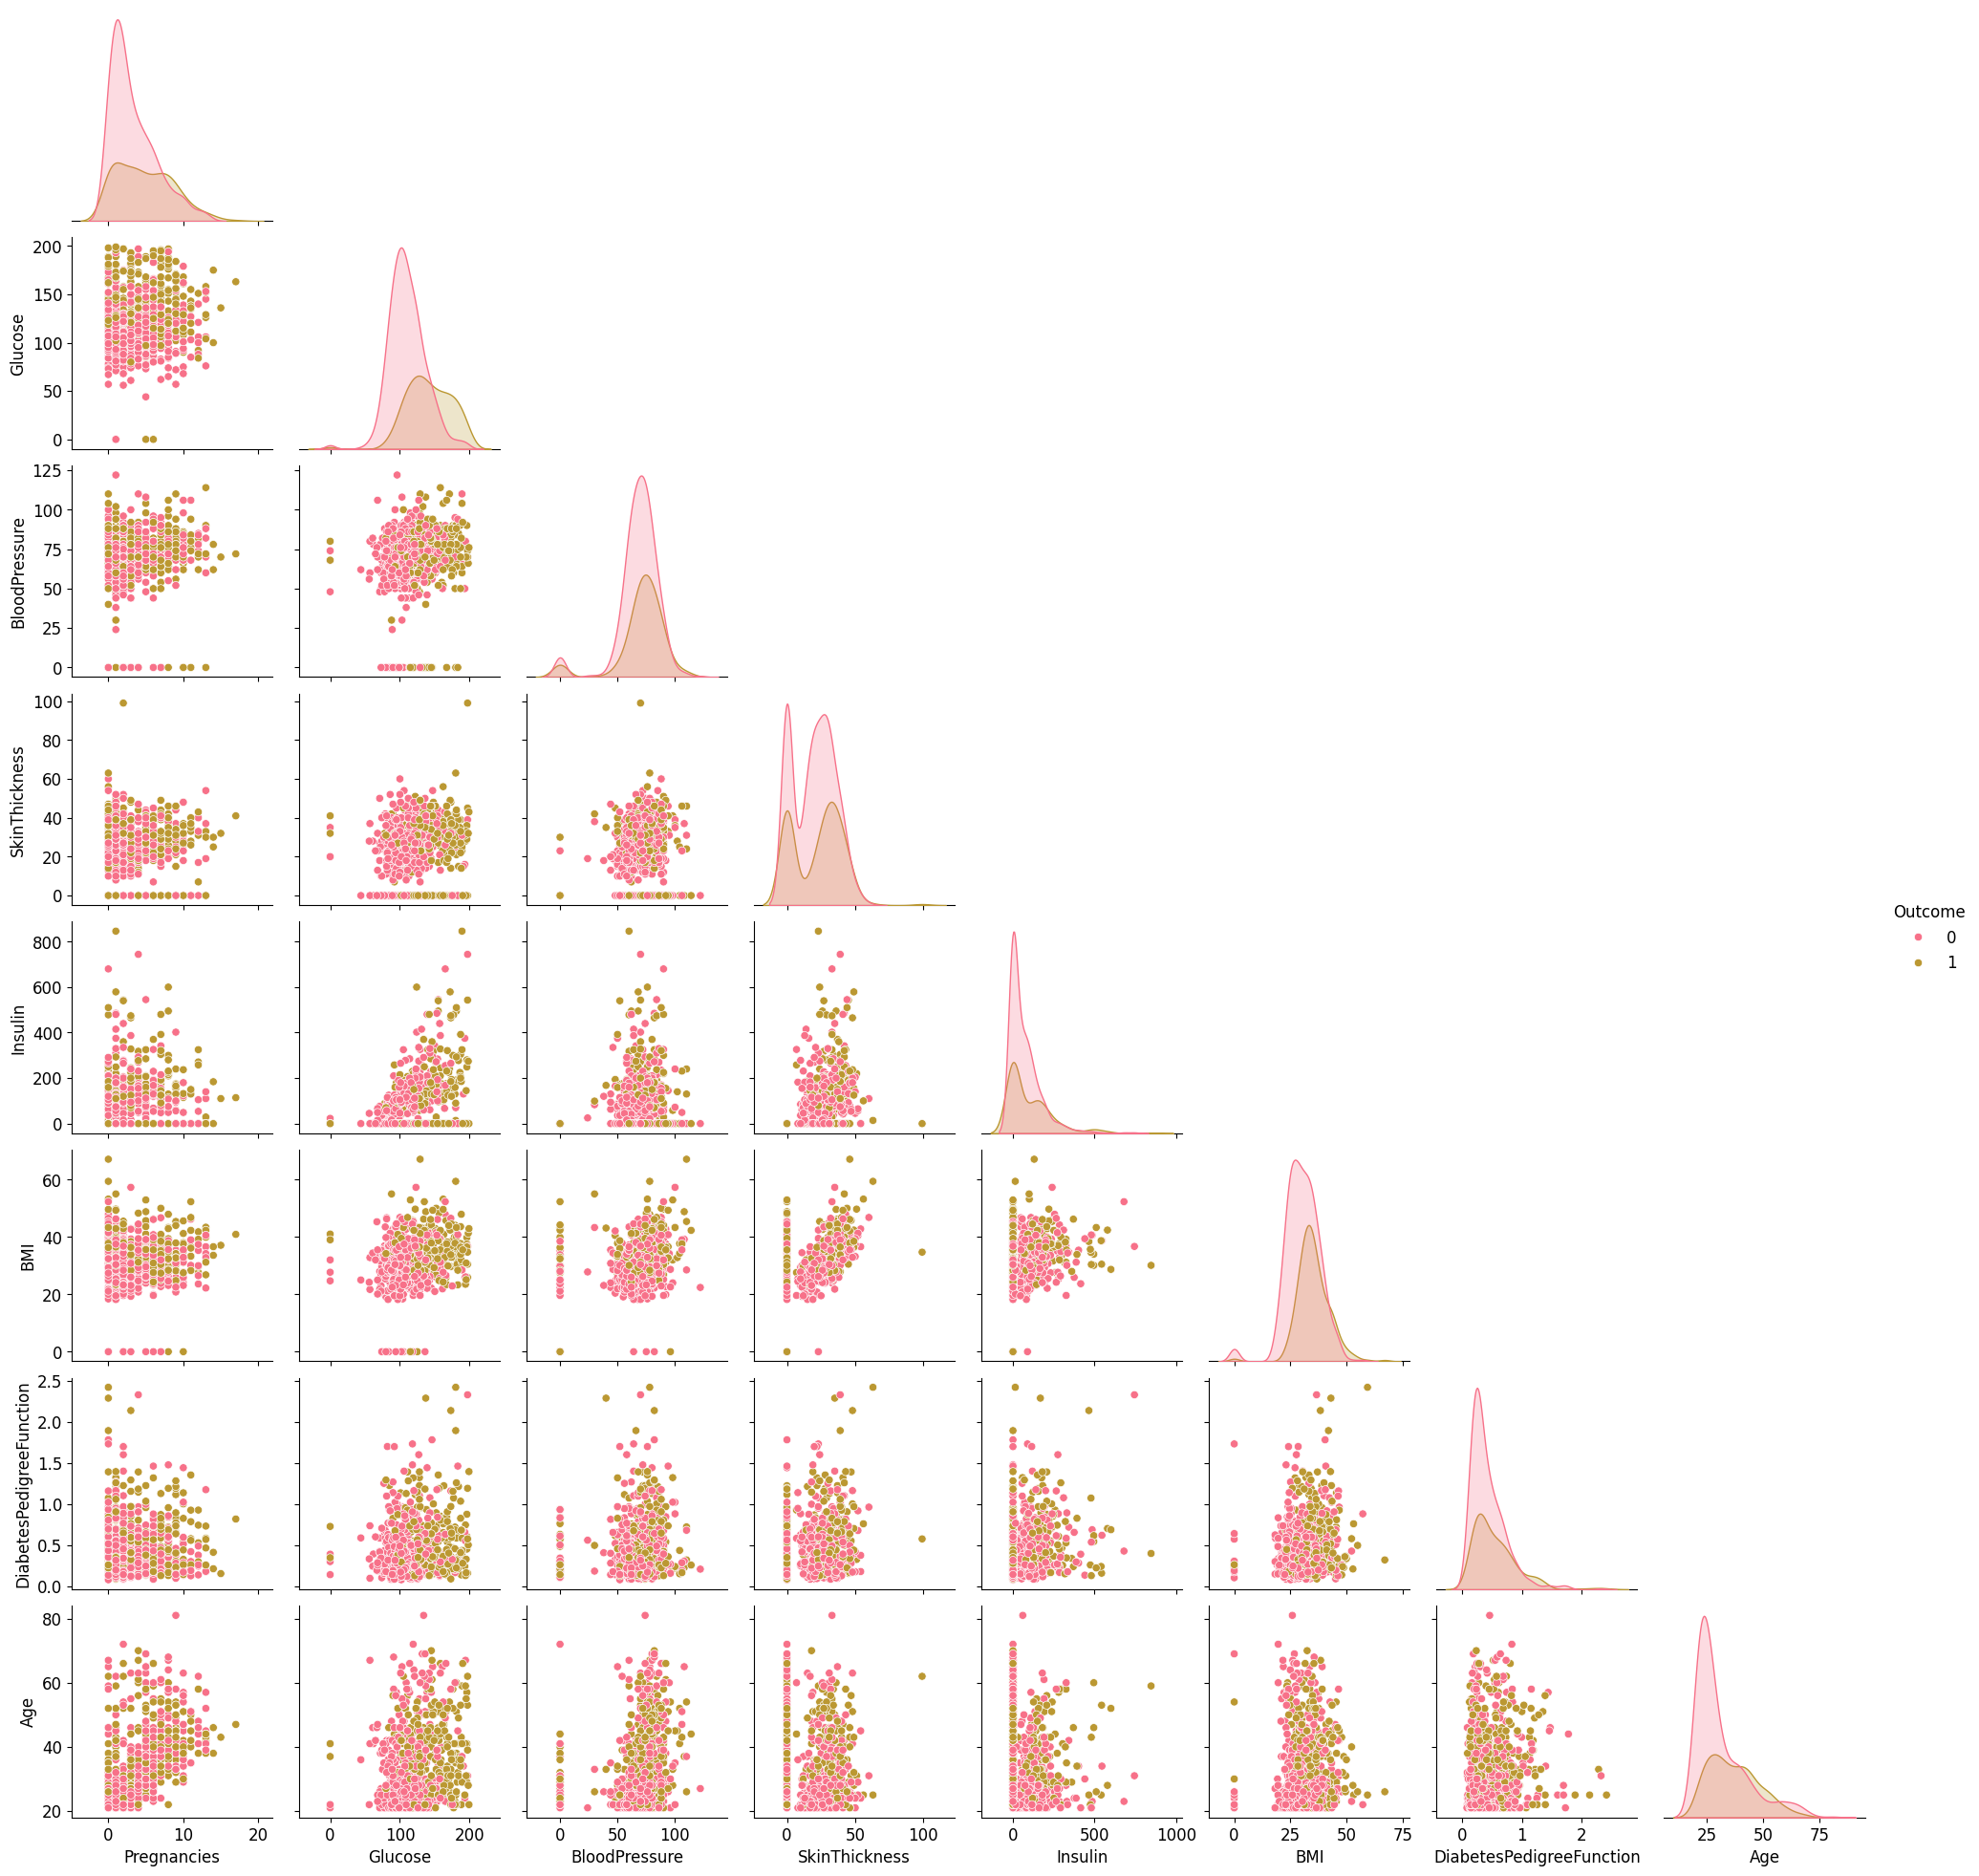

In [9]:
# Pairplot dla wszystkich zmiennych numerycznych w podziale na Outcome

sns.pairplot(df, hue='Outcome', diag_kind='kde', corner=True)
plt.show()

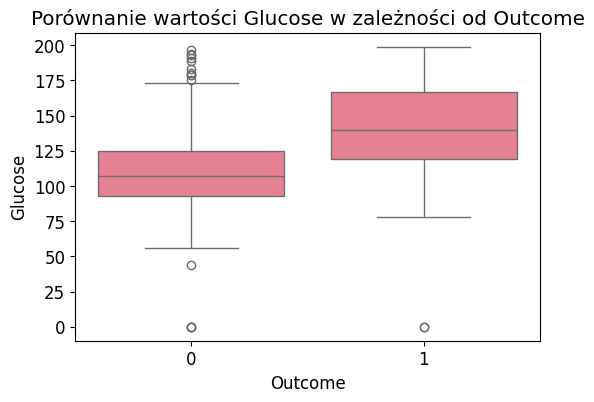

In [10]:
# Boxplot Glucose vs Outcome
plt.figure(figsize=(6,4))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Porównanie wartości Glucose w zależności od Outcome')
plt.show()


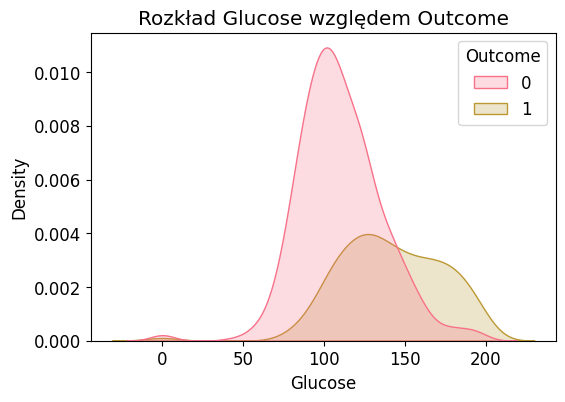

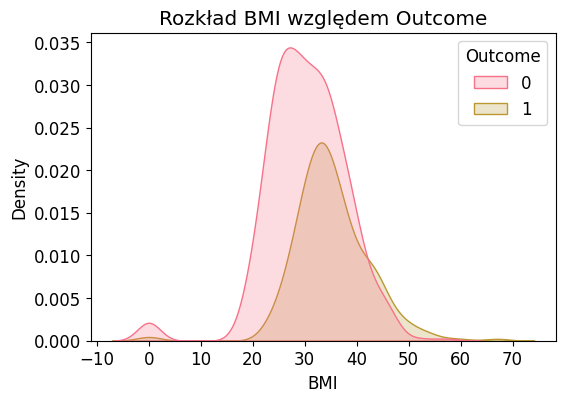

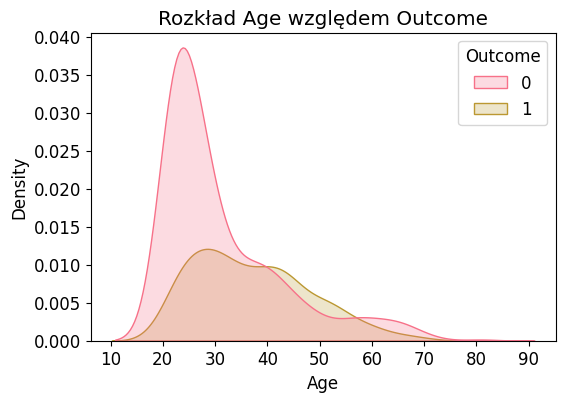

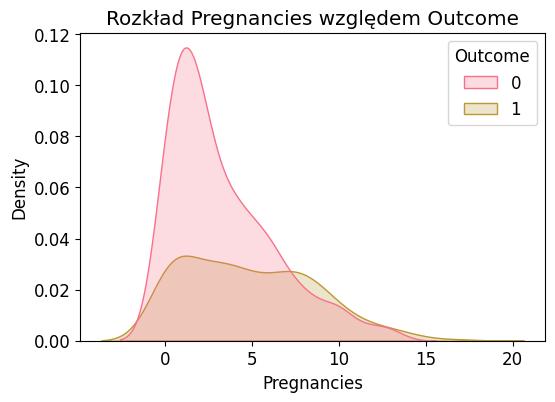

In [11]:

# Sprawdź rozkład wybranych zmiennych w podziale na Outcome
for col in ['Glucose','BMI','Age','Pregnancies']:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue='Outcome', shade=True)
    plt.title(f'Rozkład {col} względem Outcome')
    plt.show()

In [12]:

# -----------------------------------
# Obsługa potencjalnie brakujących wartości
# W opisie: kolumny Glucose, BloodPressure, SkinThickness, Insulin i BMI
# mogą zawierać wartości 0, które są nierealistyczne lub oznaczają braki.
# Zastąpimy zera w tych kolumnach wartością NaN, a następnie zastosujemy imputację.
# -----------------------------------

In [13]:
cols_with_zeros = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']


In [14]:
for c in cols_with_zeros:
    df[c] = df[c].replace(0, np.nan)

In [19]:



# Sprawdź liczbe braków po zamianie
print("\nIlość braków w kolumnach po zamianie 0 na NaN:")
print(df.isnull().sum())



Ilość braków w kolumnach po zamianie 0 na NaN:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


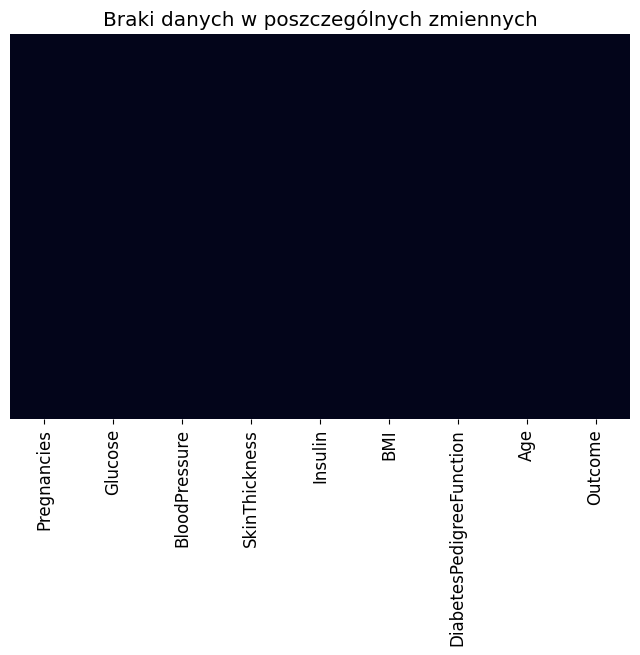

In [20]:

# Wizualizacja braków
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title("Braki danych w poszczególnych zmiennych")
plt.show()

In [21]:


# -----------------------------------
# Przygotowanie danych do modelowania
# -----------------------------------

X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [22]:
# ===================================================================
# 🛠️ PRZYGOTOWANIE DANYCH DO MODELOWANIA
# ===================================================================



# Sprawdzenie braków po konwersji zer na NaN
print("\n📊 Analiza braków danych:")
missing_analysis = pd.DataFrame({
    'Kolumna': df.columns,
    'Braki_liczba': df.isnull().sum(),
    'Braki_procent': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_analysis = missing_analysis[missing_analysis['Braki_liczba'] > 0]
print(missing_analysis)

# Identyfikacja strategii imputacji dla każdej zmiennej
print("\n🎯 Strategie imputacji dla poszczególnych zmiennych:")
imputation_strategy = {
    'Glucose': 'median',  # Kluczowa zmienna medyczna - mediana bezpieczniejsza
    'BloodPressure': 'median',  # Fizjologiczny parametr - mediana
    'SkinThickness': 'median',  # Pomiar fizyczny - mediana
    'Insulin': 'median',  # Bardzo skewed distribution - mediana
    'BMI': 'mean'  # Stosunkowo normalny rozkład - średnia
}

for col, strategy in imputation_strategy.items():
    if col in df.columns:
        print(f"  • {col}: {strategy} (braki: {df[col].isnull().sum()})")

# Wykonanie imputacji
print("\n🔄 Wykonywanie imputacji...")
for col, strategy in imputation_strategy.items():
    if col in df.columns and df[col].isnull().any():
        if strategy == 'median':
            fill_value = df[col].median()
        elif strategy == 'mean':
            fill_value = df[col].mean()
        
        df[col].fillna(fill_value, inplace=True)
        print(f"  ✅ {col}: wypełniono {strategy} = {fill_value:.2f}")

# Weryfikacja - sprawdzenie czy wszystkie braki zostały usunięte
remaining_nulls = df.isnull().sum().sum()
if remaining_nulls == 0:
    print("\n✅ Wszystkie braki danych zostały pomyślnie obsłużone!")
else:
    print(f"\n⚠️  Pozostało {remaining_nulls} braków danych do obsłużenia.")

print(f"\n📊 Finalne wymiary datasetu: {df.shape}")


📊 Analiza braków danych:
Empty DataFrame
Columns: [Kolumna, Braki_liczba, Braki_procent]
Index: []

🎯 Strategie imputacji dla poszczególnych zmiennych:
  • Glucose: median (braki: 0)
  • BloodPressure: median (braki: 0)
  • SkinThickness: median (braki: 0)
  • Insulin: median (braki: 0)
  • BMI: mean (braki: 0)

🔄 Wykonywanie imputacji...

✅ Wszystkie braki danych zostały pomyślnie obsłużone!

📊 Finalne wymiary datasetu: (768, 9)


In [23]:
# ===================================================================
# 📊 PODZIAŁ DANYCH
# ===================================================================

print("\n" + "=" * 60)
print("🎯 WYKONYWANIE STRATEGIFIED TRAIN-TEST SPLIT")
print("=" * 60)

# Przygotowanie zmiennych
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print(f"📊 Cechy (X): {X.shape[1]} zmiennych, {X.shape[0]} obserwacji")
print(f"🎯 Zmienna docelowa (y): {y.value_counts().to_dict()}")

# Stratified split - zachowuje proporcje klas w train i test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 20% na test - standard dla średnich zbiorów
    random_state=42,  # Dla reprodukowalności
    stratify=y  # Zachowuje proporcje klas!
)


print(f"\n📈 Podział wykonany:")
print(f"  • Training set: {X_train.shape[0]} obserwacji ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  • Test set: {X_test.shape[0]} obserwacji ({X_test.shape[0]/len(X)*100:.1f}%)")



🎯 WYKONYWANIE STRATEGIFIED TRAIN-TEST SPLIT
📊 Cechy (X): 8 zmiennych, 768 obserwacji
🎯 Zmienna docelowa (y): {0: 500, 1: 268}

📈 Podział wykonany:
  • Training set: 614 obserwacji (79.9%)
  • Test set: 154 obserwacji (20.1%)


In [24]:

# Weryfikacja proporcji klas po podziale
print(f"\n🎯 Proporcje klas w zbiorach:")
train_props = y_train.value_counts(normalize=True).sort_index() * 100
test_props = y_test.value_counts(normalize=True).sort_index() * 100

print(f"  📚 Training: Zdrowi: {train_props[0]:.1f}%, Cukrzyca: {train_props[1]:.1f}%")
print(f"  🧪 Test: Zdrowi: {test_props[0]:.1f}%, Cukrzyca: {test_props[1]:.1f}%")

# Sprawdzenie czy proporcje są zachowane (różnica < 2%)
prop_diff = abs(train_props[1] - test_props[1])
if prop_diff < 2.0:
    print(f"  ✅ Proporcje zachowane! (różnica: {prop_diff:.2f}%)")
else:
    print(f"  ⚠️  Duża różnica w proporcjach: {prop_diff:.2f}%")

print(f"\n💡 Używamy stratified split - kluczowe dla niezbalansowanych danych!")


🎯 Proporcje klas w zbiorach:
  📚 Training: Zdrowi: 65.1%, Cukrzyca: 34.9%
  🧪 Test: Zdrowi: 64.9%, Cukrzyca: 35.1%
  ✅ Proporcje zachowane! (różnica: 0.21%)

💡 Używamy stratified split - kluczowe dla niezbalansowanych danych!


In [25]:
# ===================================================================
# ⚖️  SKALOWANIE CECH
# ===================================================================

print("\n" + "=" * 60)
print("⚖️ SKALOWANIE CECH - KRYTYCZNE DLA KNN")
print("=" * 60)

# Analiza zakresów przed skalowaniem
print("📊 Zakresy zmiennych PRZED skalowaniem:")
for col in X_train.columns:
    min_val = X_train[col].min()
    max_val = X_train[col].max()
    range_val = max_val - min_val
    print(f"  • {col:20s}: [{min_val:6.1f}, {max_val:6.1f}] (zakres: {range_val:6.1f})")


⚖️ SKALOWANIE CECH - KRYTYCZNE DLA KNN
📊 Zakresy zmiennych PRZED skalowaniem:
  • Pregnancies         : [   0.0,   17.0] (zakres:   17.0)
  • Glucose             : [  56.0,  199.0] (zakres:  143.0)
  • BloodPressure       : [  24.0,  122.0] (zakres:   98.0)
  • SkinThickness       : [   7.0,   99.0] (zakres:   92.0)
  • Insulin             : [  15.0,  744.0] (zakres:  729.0)
  • BMI                 : [  18.2,   67.1] (zakres:   48.9)
  • DiabetesPedigreeFunction: [   0.1,    2.3] (zakres:    2.2)
  • Age                 : [  21.0,   81.0] (zakres:   60.0)


In [26]:
print(f"\n⚠️  PROBLEM: Insulina ma zakres {X_train['Insulin'].max() - X_train['Insulin'].min():.0f}, a Pregnancies tylko {X_train['Pregnancies'].max() - X_train['Pregnancies'].min():.0f}!")
print(f"💡 Bez skalowania KNN będzie zdominowane przez zmienne o dużych wartościach.")



⚠️  PROBLEM: Insulina ma zakres 729, a Pregnancies tylko 17!
💡 Bez skalowania KNN będzie zdominowane przez zmienne o dużych wartościach.


In [31]:

# Skalowanie z wykorzystaniem tylko danych treningowych (WAŻNE!)
print(f"\n🔧 Wykonywanie StandardScaler...")
scaler = StandardScaler()

# Fit TYLKO na danych treningowych - unikamy data leakage!
scaler.fit(X_train)

# Transform zarówno train jak i test
X_train_scaled = scaler.transform(X_train) # alternatywnie: scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# import joblib
# import pickle

# # Zapisz skalery do pliku
# joblib.dump(scaler, 'scaler.pkl')
# print("✅ Skalowanie wykonane i zapisane do 'models/scaler.pkl'!")

# #Zapisz z pickle 
# with open('scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)



🔧 Wykonywanie StandardScaler...


In [32]:
# Konwersja z powrotem do DataFrame dla łatwiejszej pracy
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f"✅ Skalowanie wykonane!")
print(f"📊 Sprawdzenie średnich i std po skalowaniu (training set):")
print(f"  • Średnie: {X_train_scaled.mean().round(3).to_dict()}")
print(f"  • Std: {X_train_scaled.std().round(3).to_dict()}")


✅ Skalowanie wykonane!
📊 Sprawdzenie średnich i std po skalowaniu (training set):
  • Średnie: {'Pregnancies': -0.0, 'Glucose': -0.0, 'BloodPressure': 0.0, 'SkinThickness': -0.0, 'Insulin': -0.0, 'BMI': 0.0, 'DiabetesPedigreeFunction': -0.0, 'Age': -0.0}
  • Std: {'Pregnancies': 1.001, 'Glucose': 1.001, 'BloodPressure': 1.001, 'SkinThickness': 1.001, 'Insulin': 1.001, 'BMI': 1.001, 'DiabetesPedigreeFunction': 1.001, 'Age': 1.001}


In [33]:

# Demonstracja wpływu skalowania na odległości
print(f"\n🔍 Wpływ skalowania na odległości (pierwsze 2 obserwacje):")
from scipy.spatial.distance import euclidean

# Odległość przed skalowaniem
dist_before = euclidean(X_train.iloc[0], X_train.iloc[1])
# Odległość po skalowaniu  
dist_after = euclidean(X_train_scaled.iloc[0], X_train_scaled.iloc[1])

print(f"  • Przed skalowaniem: {dist_before:.2f}")
print(f"  • Po skalowaniu: {dist_after:.2f}")
print(f"  • Zmiana: {abs(dist_before - dist_after):.2f}")

print(f"\n💡 KLUCZOWE: Scaler.fit() tylko na train, scaler.transform() na train i test!")
print(f"⚠️  To zapobiega data leakage - test nie wpływa na parametry skalowania.")


🔍 Wpływ skalowania na odległości (pierwsze 2 obserwacje):
  • Przed skalowaniem: 49.96
  • Po skalowaniu: 3.11
  • Zmiana: 46.85

💡 KLUCZOWE: Scaler.fit() tylko na train, scaler.transform() na train i test!
⚠️  To zapobiega data leakage - test nie wpływa na parametry skalowania.


In [34]:
# ===================================================================
# 🔵 MODELOWANIE K-NEAREST NEIGHBORS (KNN)
# ===================================================================

print("\n" + "=" * 60)
print("🔵 BUDOWANIE I OPTYMALIZACJA MODELU KNN")
print("=" * 60)

# 1. Baseline KNN z domyślnymi parametrami
print("🎯 Krok 1: Baseline KNN (k=5)")
knn_baseline = KNeighborsClassifier(n_neighbors=5)
knn_baseline.fit(X_train_scaled, y_train)

# Predykcje baseline
y_pred_knn_baseline = knn_baseline.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, y_pred_knn_baseline)

print(f"  • Baseline accuracy: {baseline_accuracy:.4f} ({baseline_accuracy*100:.2f}%)")
print(f"  • Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn_baseline))


🔵 BUDOWANIE I OPTYMALIZACJA MODELU KNN
🎯 Krok 1: Baseline KNN (k=5)
  • Baseline accuracy: 0.7532 (75.32%)
  • Confusion Matrix:
[[83 17]
 [21 33]]


In [35]:
# 2. Optymalizacja k z Cross-Validation
print(f"\n🔍 Krok 2: Optymalizacja parametru k")
k_range = range(1, 31)  # Testujemy k od 1 do 30
k_scores = []

print(f"Testowanie k od 1 do 30 z 5-fold CV...")
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # 5-fold cross-validation
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='f1')
    k_scores.append(scores.mean())
    if k % 5 == 0:  # Progress update co 5 iteracji
        print(f"  k={k}: F1-score = {scores.mean():.4f} (±{scores.std():.4f})")


🔍 Krok 2: Optymalizacja parametru k
Testowanie k od 1 do 30 z 5-fold CV...
  k=5: F1-score = 0.6099 (±0.0441)
  k=10: F1-score = 0.5719 (±0.0257)
  k=15: F1-score = 0.6343 (±0.0574)
  k=20: F1-score = 0.6285 (±0.0554)
  k=25: F1-score = 0.6154 (±0.0281)
  k=30: F1-score = 0.5941 (±0.0378)


In [36]:

# Znajdź optymalne k
optimal_k = k_range[np.argmax(k_scores)]
optimal_score = max(k_scores)

print(f"\n✅ Optymalne k = {optimal_k} z F1-score = {optimal_score:.4f}")


✅ Optymalne k = 19 z F1-score = 0.6492


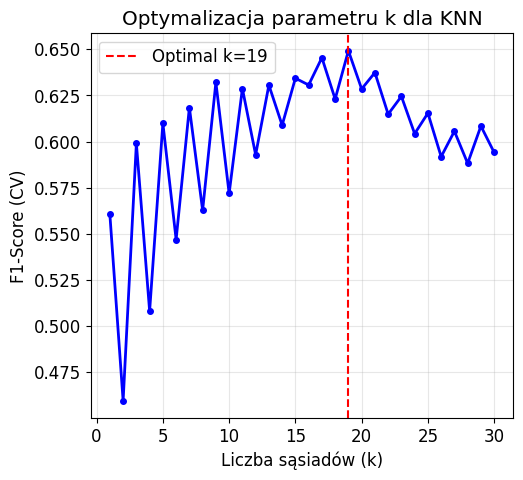

In [37]:

# Wizualizacja wyników
plt.figure(figsize=(12, 5))

# Subplot 1: F1-score vs k
plt.subplot(1, 2, 1)
plt.plot(k_range, k_scores, 'b-o', linewidth=2, markersize=4)
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k={optimal_k}')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('F1-Score (CV)')
plt.title('Optymalizacja parametru k dla KNN')
plt.grid(True, alpha=0.3)
plt.legend()

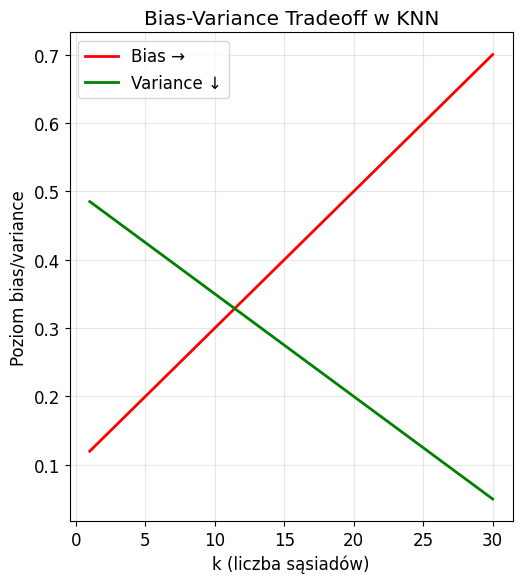


💡 Interpretacja optimal k=19:
  • Duże k - model prostszy, może być underfitting


In [38]:


# Subplot 2: Bias-Variance illustration
plt.subplot(1, 2, 2)
k_range_plot = list(k_range)
bias_trend = [0.1 + 0.02*k for k in k_range_plot]  # Symulacja trendu bias
variance_trend = [0.5 - 0.015*k for k in k_range_plot]  # Symulacja trendu variance

plt.plot(k_range_plot, bias_trend, 'r-', label='Bias →', linewidth=2)
plt.plot(k_range_plot, variance_trend, 'g-', label='Variance ↓', linewidth=2)
plt.xlabel('k (liczba sąsiadów)')
plt.ylabel('Poziom bias/variance')
plt.title('Bias-Variance Tradeoff w KNN')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 Interpretacja optimal k={optimal_k}:")
if optimal_k <= 5:
    print(f"  • Małe k - model skomplikowany, może być overfitting")
elif optimal_k <= 15:
    print(f"  • Średnie k - dobry balans bias-variance")
else:
    print(f"  • Duże k - model prostszy, może być underfitting")

In [39]:
# 3. Finalny model KNN z optymalnym k
print(f"\n🏆 Krok 3: Finalny model KNN (k={optimal_k})")
knn_final = KNeighborsClassifier(n_neighbors=optimal_k)
knn_final.fit(X_train_scaled, y_train)

# Predykcje finalne
y_pred_knn = knn_final.predict(X_test_scaled)
y_proba_knn = knn_final.predict_proba(X_test_scaled)[:, 1]  # Prawdopodobieństwa klasy 1



🏆 Krok 3: Finalny model KNN (k=19)


<Axes: xlabel='Outcome'>

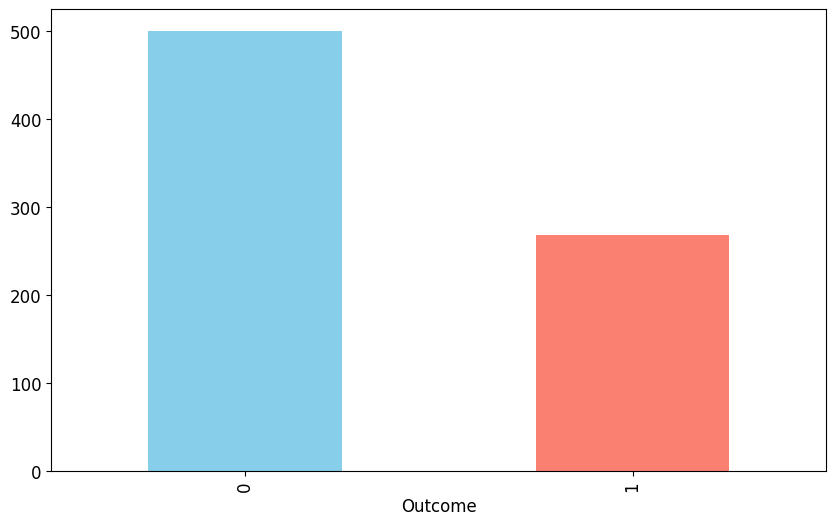

In [42]:
df['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

In [40]:

# Kompleksowa ewaluacja
knn_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_knn),
    'precision': precision_score(y_test, y_pred_knn),
    'recall': recall_score(y_test, y_pred_knn),
    'f1': f1_score(y_test, y_pred_knn),
    'roc_auc': roc_auc_score(y_test, y_proba_knn)
}

print(f"\n📊 Metryki finalne KNN (k={optimal_k}):")
for metric, value in knn_metrics.items():
    print(f"  • {metric.upper():10s}: {value:.4f} ({value*100:.2f}%)")



📊 Metryki finalne KNN (k=19):
  • ACCURACY  : 0.7468 (74.68%)
  • PRECISION : 0.6667 (66.67%)
  • RECALL    : 0.5556 (55.56%)
  • F1        : 0.6061 (60.61%)
  • ROC_AUC   : 0.8088 (80.88%)


In [43]:

# Macierz konfuzji
print(f"\n📋 Macierz konfuzji KNN:")
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

# Interpretacja 
tn, fp, fn, tp = cm_knn.ravel()
print(f"\n🏥 Interpretacja:")
print(f"  ✅ True Negatives (TN): {tn} - Zdrowe poprawnie zidentyfikowane")
print(f"  ⚠️  False Positives (FP): {fp} - Zdrowe błędnie jako chore (niepotrzebne badania)")
print(f"  😨 False Negatives (FN): {fn} - Chore przegapione (NIEBEZPIECZNE!)")
print(f"  ✅ True Positives (TP): {tp} - Chore poprawnie wykryte")

if fn > 0:
    print(f"\n⚠️  UWAGA: {fn} pacjentek z cukrzycą nie zostało wykrytych!")
    print(f"  💡 Rozważ obniżenie progu klasyfikacji dla większego recall.")

print(f"\n✅ Model KNN gotowy! Najlepszy k={optimal_k} z F1={knn_metrics['f1']:.4f}")


📋 Macierz konfuzji KNN:
[[85 15]
 [24 30]]

🏥 Interpretacja:
  ✅ True Negatives (TN): 85 - Zdrowe poprawnie zidentyfikowane
  ⚠️  False Positives (FP): 15 - Zdrowe błędnie jako chore (niepotrzebne badania)
  😨 False Negatives (FN): 24 - Chore przegapione (NIEBEZPIECZNE!)
  ✅ True Positives (TP): 30 - Chore poprawnie wykryte

⚠️  UWAGA: 24 pacjentek z cukrzycą nie zostało wykrytych!
  💡 Rozważ obniżenie progu klasyfikacji dla większego recall.

✅ Model KNN gotowy! Najlepszy k=19 z F1=0.6061


In [44]:
# ===================================================================
# 🟡 MODELOWANIE REGRESJA LOGISTYCZNA
# ===================================================================

print("\n" + "=" * 60)
print("🟡 BUDOWANIE I OPTYMALIZACJA REGRESJI LOGISTYCZNEJ")
print("=" * 60)

# 1. Baseline Logistic Regression
print("🎯 Krok 1: Baseline Logistic Regression")
lr_baseline = LogisticRegression(random_state=42, max_iter=1000)
lr_baseline.fit(X_train_scaled, y_train)

y_pred_lr_baseline = lr_baseline.predict(X_test_scaled)
baseline_lr_accuracy = accuracy_score(y_test, y_pred_lr_baseline)

print(f"  • Baseline accuracy: {baseline_lr_accuracy:.4f} ({baseline_lr_accuracy*100:.2f}%)")
print(f"  • Baseline coefficients (top 3):")
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_baseline.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)
print(coef_df.head(3))


🟡 BUDOWANIE I OPTYMALIZACJA REGRESJI LOGISTYCZNEJ
🎯 Krok 1: Baseline Logistic Regression
  • Baseline accuracy: 0.7078 (70.78%)
  • Baseline coefficients (top 3):
       Feature  Coefficient
1      Glucose     1.182599
5          BMI     0.688602
0  Pregnancies     0.377413


In [46]:

#  jeśli używasz GridSearchCV, to nie musisz się martwić o nielegalne kombinacje parametrów, 
# ponieważ GridSearchCV automatycznie je pominie. Jednakże, jeśli chcesz mieć pełną kontrolę nad tym, 
# jakie kombinacje są testowane, możesz użyć Conditional Parameter Space lub po prostu zdefiniować parametry w taki sposób, aby uniknąć nielegalnych kombinacji.
param_grid_lr = {
    'penalty':      ['l1', 'l2', 'elasticnet'],
    'solver':       ['liblinear', 'saga'],
    'C':            [0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced'],
    # Ten parametr jest brany pod uwagę tylko, gdy penalty='elasticnet'
    'l1_ratio':     [0.1, 0.5, 0.9, None],
}


In [49]:
# Grid Search z cross-validation
grid_search_lr = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=2000, n_jobs=-1),
    param_grid_lr,
    cv=5,
    scoring='f1',  # F1 dla niezbalansowanych danych
    n_jobs=-1,  # Użyj wszystkich core'ów
    verbose=1
)

print(f"\n🔄 Uruchamianie Grid Search...")
grid_search_lr.fit(X_train_scaled, y_train)

print(f"\n✅ Grid Search zakończony!")
print(f"  • Najlepszy F1-score: {grid_search_lr.best_score_:.4f}")
print(f"  • Najlepsze parametry:")
for param, value in grid_search_lr.best_params_.items():
    print(f"    - {param}: {value}")


🔄 Uruchamianie Grid Search...
Fitting 5 folds for each of 240 candidates, totalling 1200 fits

✅ Grid Search zakończony!
  • Najlepszy F1-score: 0.6758
  • Najlepsze parametry:
    - C: 0.1
    - class_weight: balanced
    - l1_ratio: 0.1
    - penalty: l2
    - solver: saga


In [48]:
# 3. Finalny model z najlepszymi parametrami
lr_final = grid_search_lr.best_estimator_
y_pred_lr = lr_final.predict(X_test_scaled)
y_proba_lr = lr_final.predict_proba(X_test_scaled)[:, 1]

# Kompleksowa ewaluacja
lr_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_lr),
    'precision': precision_score(y_test, y_pred_lr),
    'recall': recall_score(y_test, y_pred_lr),
    'f1': f1_score(y_test, y_pred_lr),
    'roc_auc': roc_auc_score(y_test, y_proba_lr)
}

print(f"\n📊 Metryki finalne Logistic Regression:")
for metric, value in lr_metrics.items():
    print(f"  • {metric.upper():10s}: {value:.4f} ({value*100:.2f}%)")

print(f"\n✅ Model Logistic Regression gotowy!")


📊 Metryki finalne Logistic Regression:
  • ACCURACY  : 0.7078 (70.78%)
  • PRECISION : 0.5714 (57.14%)
  • RECALL    : 0.6667 (66.67%)
  • F1        : 0.6154 (61.54%)
  • ROC_AUC   : 0.8104 (81.04%)

✅ Model Logistic Regression gotowy!


In [50]:
y_proba_lr

array([0.70008621, 0.24081533, 0.44751154, 0.39050248, 0.07455823,
       0.28653934, 0.65296492, 0.94280129, 0.15004289, 0.88709112,
       0.40436982, 0.59178608, 0.21106686, 0.21709989, 0.38532741,
       0.49101004, 0.80721862, 0.14531135, 0.84325111, 0.2088492 ,
       0.2867013 , 0.88269099, 0.29007784, 0.94861531, 0.68951306,
       0.03482332, 0.76027707, 0.0862433 , 0.44844087, 0.0754128 ,
       0.08912146, 0.08372621, 0.59771947, 0.80850096, 0.91145251,
       0.24065959, 0.48538097, 0.12386484, 0.85122596, 0.74193806,
       0.46068754, 0.20393068, 0.18374464, 0.40065996, 0.25955911,
       0.56452768, 0.22208725, 0.19460602, 0.81441319, 0.46613905,
       0.72211901, 0.7851382 , 0.60763358, 0.11886869, 0.66273818,
       0.5080836 , 0.81023918, 0.36469384, 0.84466965, 0.25671699,
       0.87603475, 0.3622277 , 0.10327261, 0.91057825, 0.06841218,
       0.31060109, 0.91673735, 0.04384613, 0.43512682, 0.78934642,
       0.28835223, 0.16979031, 0.4939399 , 0.60455055, 0.07565

In [51]:
# ===================================================================
# 🔍 INTERPRETACJA WSPÓŁCZYNNIKÓW REGRESJI LOGISTYCZNEJ
# ===================================================================

print("\n" + "=" * 60)
print("🔍 INTERPRETACJA WSPÓŁCZYNNIKÓW I ZNACZENIE BIZNESOWE")
print("=" * 60)

# Analiza współczynników
coefficients = lr_final.coef_[0]
feature_names = X_train.columns

# DataFrame z współczynnikami
coef_analysis = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients),
    'Odds_Ratio': np.exp(coefficients)  # e^coeff = odds ratio
}).sort_values('Abs_Coefficient', ascending=False)
print("📊 Ranking zmiennych według wagi (współczynniki):")
for idx, row in coef_analysis.iterrows():
    direction = "→" if row['Coefficient'] > 0 else "↓"
    print(f"  {direction} {row['Feature']:25s}: {row['Coefficient']:+7.3f} (OR: {row['Odds_Ratio']:5.2f})")



🔍 INTERPRETACJA WSPÓŁCZYNNIKÓW I ZNACZENIE BIZNESOWE
📊 Ranking zmiennych według wagi (współczynniki):
  → Glucose                  :  +1.023 (OR:  2.78)
  → BMI                      :  +0.599 (OR:  1.82)
  → Pregnancies              :  +0.320 (OR:  1.38)
  → DiabetesPedigreeFunction :  +0.256 (OR:  1.29)
  → Age                      :  +0.189 (OR:  1.21)
  → SkinThickness            :  +0.059 (OR:  1.06)
  → BloodPressure            :  +0.017 (OR:  1.02)
  → Insulin                  :  +0.016 (OR:  1.02)


In [52]:
# Interpretacja  najważniejszych czynników
print(f"\n🏥 INTERPRETACJA :")
top_features = coef_analysis.head(3)

for idx, row in top_features.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    odds_ratio = row['Odds_Ratio']
    
    if coef > 0:
        effect = "ZWIĘKSZA"
        change = f"o {((odds_ratio-1)*100):.0f}%" if odds_ratio > 1 else f"nieznacznie"
    else:
        effect = "ZMNIEJSZA"
        change = f"o {((1-odds_ratio)*100):.0f}%" if odds_ratio < 1 else f"nieznacznie"
    
    print(f"\n  🔹 {feature}:")
    print(f"     • Współczynnik: {coef:+.3f}")
    print(f"     • {effect} ryzyko cukrzycy {change}")
    print(f"     • Odds Ratio: {odds_ratio:.2f}")
    
    # Szczegółowe interpretacje
    if feature == 'Glucose':
        print(f"     • Każdy mg/dL wzrostu glukozy zwiększa szanse na cukrzycę")
    elif feature == 'BMI':
        print(f"     • Każdy punkt BMI wpływa na ryzyko cukrzycy")
    elif feature == 'Age':
        print(f"     • Każdy rok życia wpływa na ryzyko cukrzycy")
    elif feature == 'Pregnancies':
        print(f"     • Każda ciąża wpływa na ryzyko cukrzycy")


🏥 INTERPRETACJA :

  🔹 Glucose:
     • Współczynnik: +1.023
     • ZWIĘKSZA ryzyko cukrzycy o 178%
     • Odds Ratio: 2.78
     • Każdy mg/dL wzrostu glukozy zwiększa szanse na cukrzycę

  🔹 BMI:
     • Współczynnik: +0.599
     • ZWIĘKSZA ryzyko cukrzycy o 82%
     • Odds Ratio: 1.82
     • Każdy punkt BMI wpływa na ryzyko cukrzycy

  🔹 Pregnancies:
     • Współczynnik: +0.320
     • ZWIĘKSZA ryzyko cukrzycy o 38%
     • Odds Ratio: 1.38
     • Każda ciąża wpływa na ryzyko cukrzycy


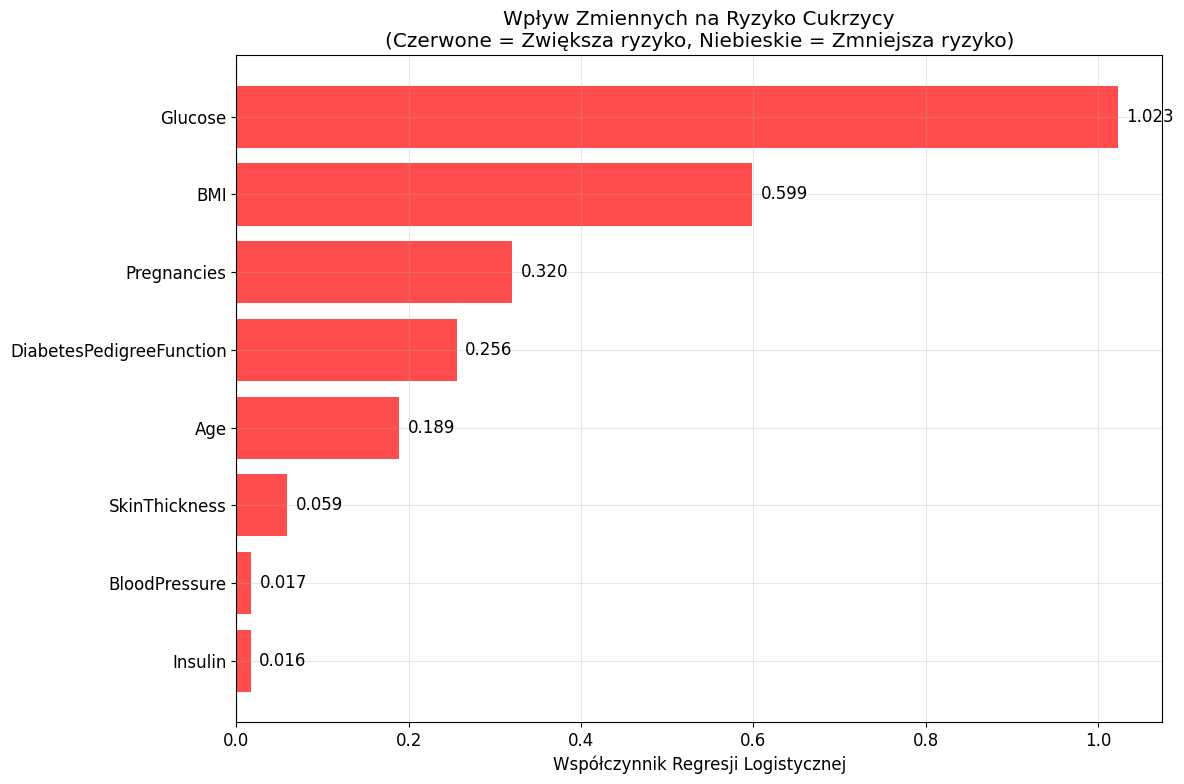

In [53]:
# Wizualizacja współczynników
plt.figure(figsize=(12, 8))

# Sortowanie dla lepszej wizualizacji
coef_plot = coef_analysis.sort_values('Coefficient')

# Kolorowanie: pozytywne = czerwone, negatywne = niebieskie
colors = ['red' if x > 0 else 'blue' for x in coef_plot['Coefficient']]

plt.barh(range(len(coef_plot)), coef_plot['Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(coef_plot)), coef_plot['Feature'])
plt.xlabel('Współczynnik Regresji Logistycznej')
plt.title('Wpływ Zmiennych na Ryzyko Cukrzycy\n(Czerwone = Zwiększa ryzyko, Niebieskie = Zmniejsza ryzyko)')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
plt.grid(True, alpha=0.3)


# Dodanie wartości na wykresie
for i, (idx, row) in enumerate(coef_plot.iterrows()):
    plt.text(row['Coefficient'] + (0.01 if row['Coefficient'] > 0 else -0.01), 
             i, f"{row['Coefficient']:.3f}", 
             va='center', ha='left' if row['Coefficient'] > 0 else 'right')

plt.tight_layout()
plt.show()

In [63]:
print(f"\n💡 KLUCZOWE WNIOSKI DLA SZPITALA:")
print(f"  1. Glucose to najważniejszy predyktor - koniecznie monitorować!")
print(f"  2. BMI i wiek to istotne czynniki ryzyka")
print(f"  3. Model może wspierać lekarzy w identyfikacji pacjentów wysokiego ryzyka")
print(f"  4. Współczynniki są interpretwalne - łatwo wytłumaczyć lekarzom")


💡 KLUCZOWE WNIOSKI DLA SZPITALA:
  1. Glucose to najważniejszy predyktor - koniecznie monitorować!
  2. BMI i wiek to istotne czynniki ryzyka
  3. Model może wspierać lekarzy w identyfikacji pacjentów wysokiego ryzyka
  4. Współczynniki są interpretwalne - łatwo wytłumaczyć lekarzom


In [54]:
# ===================================================================
# 🏆 PORÓWNANIE MODELI I FINALNA OCENA
# ===================================================================

print("\n" + "=" * 60)
print("🏆 KOMPLEKSOWE PORÓWNANIE MODELI")
print("=" * 60)

# Zestawienie wszystkich metryk
comparison_df = pd.DataFrame({
    'Model': ['KNN (k={})'.format(optimal_k), 'Logistic Regression'],
    'Accuracy': [knn_metrics['accuracy'], lr_metrics['accuracy']],
    'Precision': [knn_metrics['precision'], lr_metrics['precision']],
    'Recall': [knn_metrics['recall'], lr_metrics['recall']],
    'F1-Score': [knn_metrics['f1'], lr_metrics['f1']],
    'ROC-AUC': [knn_metrics['roc_auc'], lr_metrics['roc_auc']]
})

print("📊 ZESTAWIENIE METRYK:")
print(comparison_df.round(4))


🏆 KOMPLEKSOWE PORÓWNANIE MODELI
📊 ZESTAWIENIE METRYK:
                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0           KNN (k=19)    0.7468     0.6667  0.5556    0.6061   0.8088
1  Logistic Regression    0.7078     0.5714  0.6667    0.6154   0.8104


In [55]:
# Identyfikacja najlepszego modelu
best_f1_idx = comparison_df['F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_f1_idx, 'Model']
best_f1_score = comparison_df.loc[best_f1_idx, 'F1-Score']

print(f"\n🏅 NAJLEPSZY MODEL: {best_model_name}")
print(f"   • F1-Score: {best_f1_score:.4f}")
print(f"   • Metryka F1 wybrana z powodu niezbalansowanych danych")



🏅 NAJLEPSZY MODEL: Logistic Regression
   • F1-Score: 0.6154
   • Metryka F1 wybrana z powodu niezbalansowanych danych


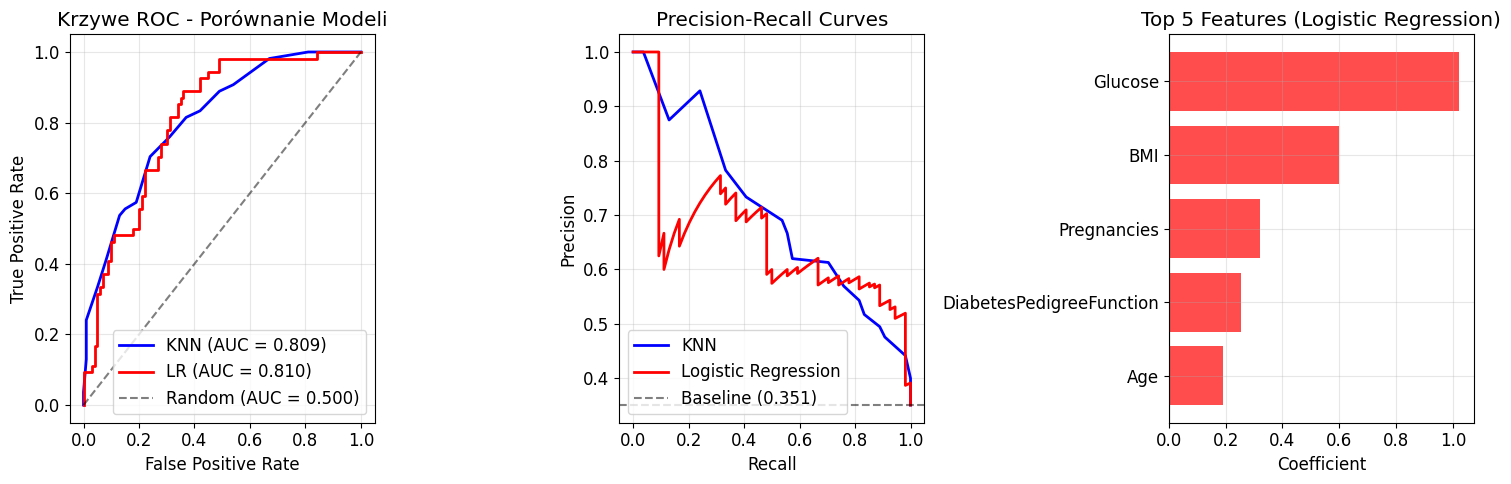

In [56]:
# Krzywe ROC dla obu modeli
plt.figure(figsize=(15, 5))

# ROC Curves
plt.subplot(1, 3, 1)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)

plt.plot(fpr_knn, tpr_knn, 'b-', label=f'KNN (AUC = {knn_metrics["roc_auc"]:.3f})', linewidth=2)
plt.plot(fpr_lr, tpr_lr, 'r-', label=f'LR (AUC = {lr_metrics["roc_auc"]:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.500)', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywe ROC - Porównanie Modeli')
plt.legend()
plt.grid(True, alpha=0.3)

# Precision-Recall Curves
plt.subplot(1, 3, 2)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_proba_knn)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_proba_lr)

plt.plot(recall_knn, precision_knn, 'b-', label=f'KNN', linewidth=2)
plt.plot(recall_lr, precision_lr, 'r-', label=f'Logistic Regression', linewidth=2)

# Baseline - proporcja pozytywnych klas
baseline_precision = y_test.mean()
plt.axhline(y=baseline_precision, color='k', linestyle='--', alpha=0.5, label=f'Baseline ({baseline_precision:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.grid(True, alpha=0.3)

# Feature Importance porównanie (tylko dla LR - KNN nie ma interpretowalności)
plt.subplot(1, 3, 3)
top_features_viz = coef_analysis.head(5).sort_values('Coefficient')
colors_viz = ['red' if x > 0 else 'blue' for x in top_features_viz['Coefficient']]

plt.barh(range(len(top_features_viz)), top_features_viz['Coefficient'], color=colors_viz, alpha=0.7)
plt.yticks(range(len(top_features_viz)), top_features_viz['Feature'])
plt.xlabel('Coefficient')
plt.title('Top 5 Features (Logistic Regression)')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

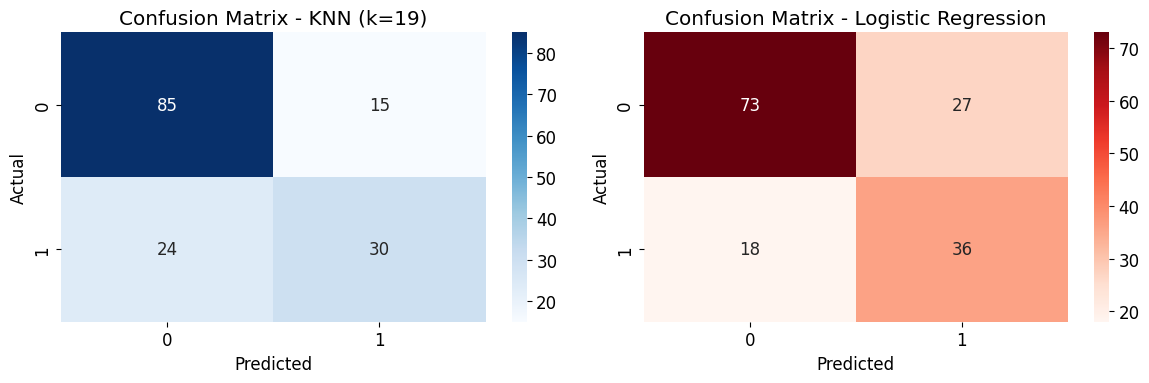

In [67]:


# Macierze konfuzji obok siebie
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# KNN Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title(f'Confusion Matrix - KNN (k={optimal_k})')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# LR Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Reds', ax=ax2)
ax2.set_title('Confusion Matrix - Logistic Regression')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [68]:
print(f"\n💡 REKOMENDACJE DLA SZPITALA:")
if best_model_name.startswith('KNN'):
    print(f"  ✅ KNN jest najlepszy dla tego problemu")
    print(f"  • Zalety: Dobra wydajność, uwzględnia lokalne wzorce")
    print(f"  • Wady: Trudno interpretowalny, wymaga skalowania")
    print(f"  • Użycie: Dobre dla szybkiego screeningu")
else:
    print(f"  ✅ Logistic Regression jest najlepsza dla tego problemu")
    print(f"  • Zalety: Łatwa interpretacja, szybka, stabilna")
    print(f"  • Wady: Zakłada liniowość w logit space")
    print(f"  • Użycie: Idealna do wsparcia decyzji lekarskich")

print(f"\n🎯 NEXT STEPS:")
print(f"  1. Wdrożenie modelu w systemie szpitalnym")
print(f"  2. Monitorowanie wydajności na nowych danych")
print(f"  3. Regularne świżenie modelu (co 6-12 miesięcy)")
print(f"  4. Szkolenie personelu medycznego z interpretacji wyników")

print(f"\n✅ ANALIZA KOMPLETNA! Modele gotowe do wdrożenia. 🎉")


💡 REKOMENDACJE DLA SZPITALA:
  ✅ Logistic Regression jest najlepsza dla tego problemu
  • Zalety: Łatwa interpretacja, szybka, stabilna
  • Wady: Zakłada liniowość w logit space
  • Użycie: Idealna do wsparcia decyzji lekarskich

🎯 NEXT STEPS:
  1. Wdrożenie modelu w systemie szpitalnym
  2. Monitorowanie wydajności na nowych danych
  3. Regularne świżenie modelu (co 6-12 miesięcy)
  4. Szkolenie personelu medycznego z interpretacji wyników

✅ ANALIZA KOMPLETNA! Modele gotowe do wdrożenia. 🎉



🚀 ZAAWANSOWANE ANALIZY I OPTYMALIZACJA PROGÓW
🎯 Krok 1: Optymalizacja progu decyzyjnego


In [57]:
# ===================================================================
# 🚀 ZAAWANSOWANE TECHNIKI I PRAKTYCZNE WSKAZÓWKI
# ===================================================================

print("\n" + "=" * 60)
print("🚀 ZAAWANSOWANE ANALIZY I OPTYMALIZACJA PROGÓW")
print("=" * 60)

# 1. Optymalizacja progu klasyfikacji dla konkretnego celu biznesowego
print("🎯 Krok 1: Optymalizacja progu decyzyjnego")

# Generuj różne progi i odpowiadające metryki
thresholds = np.arange(0.1, 0.9, 0.05)
threshold_results = []

for threshold in thresholds:
    # Zastosuj próg do prawdopodobieństw najlepszego modelu
    if best_model_name.startswith('KNN'):
        y_pred_threshold = (y_proba_knn >= threshold).astype(int)
    else:
        y_pred_threshold = (y_proba_lr >= threshold).astype(int)
    
    # Oblicz metryki dla tego progu
    precision = precision_score(y_test, y_pred_threshold, zero_division=0)
    recall = recall_score(y_test, y_pred_threshold, zero_division=0)
    f1 = f1_score(y_test, y_pred_threshold, zero_division=0)
    
    threshold_results.append({
        'threshold': threshold,
        'precision': precision,
        'recall': recall,
        'f1': f1
    })

threshold_df = pd.DataFrame(threshold_results)

# Znajdź próg optymalizujący F1
optimal_threshold_idx = threshold_df['f1'].idxmax()
optimal_threshold = threshold_df.loc[optimal_threshold_idx, 'threshold']
optimal_f1 = threshold_df.loc[optimal_threshold_idx, 'f1']

print(f"\n  • Optymalny próg dla F1: {optimal_threshold:.2f} (F1: {optimal_f1:.4f})")
print(f"  • Domyślny próg: 0.50")



🚀 ZAAWANSOWANE ANALIZY I OPTYMALIZACJA PROGÓW
🎯 Krok 1: Optymalizacja progu decyzyjnego

  • Optymalny próg dla F1: 0.40 (F1: 0.6767)
  • Domyślny próg: 0.50


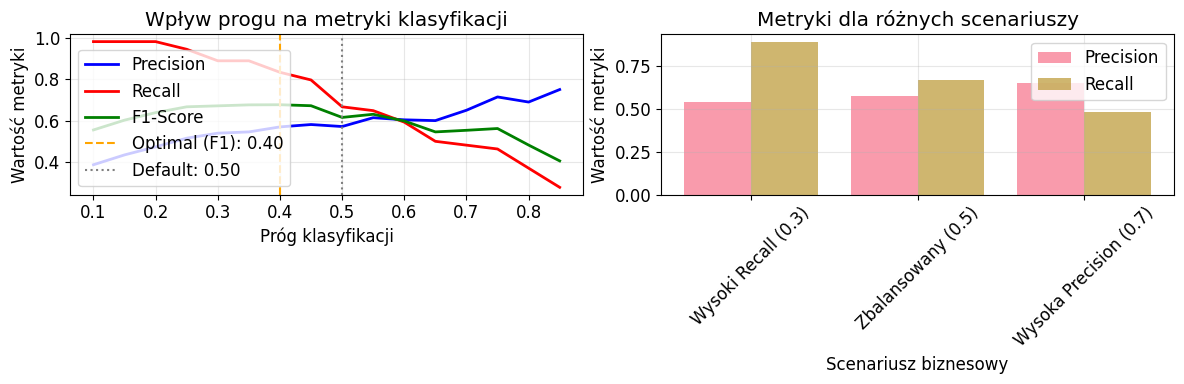

In [58]:
# Wizualizacja wpływu progu na metryki
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(threshold_df['threshold'], threshold_df['precision'], 'b-', label='Precision', linewidth=2)
plt.plot(threshold_df['threshold'], threshold_df['recall'], 'r-', label='Recall', linewidth=2)
plt.plot(threshold_df['threshold'], threshold_df['f1'], 'g-', label='F1-Score', linewidth=2)
plt.axvline(x=optimal_threshold, color='orange', linestyle='--', label=f'Optimal (F1): {optimal_threshold:.2f}')
plt.axvline(x=0.5, color='gray', linestyle=':', label='Default: 0.50')
plt.xlabel('Próg klasyfikacji')
plt.ylabel('Wartość metryki')
plt.title('Wpływ progu na metryki klasyfikacji')
plt.legend()
plt.grid(True, alpha=0.3)

# Business scenarios
plt.subplot(1, 2, 2)
scenarios = {
    'Wysoki Recall (0.3)': 0.3,  # Nie chcemy przegapić żadnej choroby
    'Zbalansowany (0.5)': 0.5,   # Standard
    'Wysoka Precision (0.7)': 0.7  # Nie chcemy niepotrzebnych alarmów
}

scenario_results = []
for name, thresh in scenarios.items():
    if best_model_name.startswith('KNN'):
        y_pred_scenario = (y_proba_knn >= thresh).astype(int)
    else:
        y_pred_scenario = (y_proba_lr >= thresh).astype(int)
    
    prec = precision_score(y_test, y_pred_scenario, zero_division=0)
    rec = recall_score(y_test, y_pred_scenario, zero_division=0)
    scenario_results.append({'Scenario': name, 'Precision': prec, 'Recall': rec})

scenario_df = pd.DataFrame(scenario_results)
x_pos = np.arange(len(scenario_df))

plt.bar(x_pos - 0.2, scenario_df['Precision'], 0.4, label='Precision', alpha=0.7)
plt.bar(x_pos + 0.2, scenario_df['Recall'], 0.4, label='Recall', alpha=0.7)
plt.xlabel('Scenariusz biznesowy')
plt.ylabel('Wartość metryki')
plt.title('Metryki dla różnych scenariuszy')
plt.xticks(x_pos, scenario_df['Scenario'], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [59]:
print(f"\n🏥 REKOMENDACJE PROGÓW DLA SZPITALA:")
print(f"  • Screening diagnostyczny: próg 0.3 (wysoki recall)")
print(f"  • Rutynowe badania: próg {optimal_threshold:.2f} (optymalny F1)")
print(f"  • Badania specjalistyczne: próg 0.7 (wysoka precision)")


🏥 REKOMENDACJE PROGÓW DLA SZPITALA:
  • Screening diagnostyczny: próg 0.3 (wysoki recall)
  • Rutynowe badania: próg 0.40 (optymalny F1)
  • Badania specjalistyczne: próg 0.7 (wysoka precision)


In [60]:
# 2. Analiza stabilności modelu z Cross-Validation
print(f"\n\n🔄 Krok 2: Analiza stabilności z 10-fold Cross-Validation")

from sklearn.model_selection import StratifiedKFold

# Cross-validation dla najlepszego modelu
if best_model_name.startswith('KNN'):
    best_model = KNeighborsClassifier(n_neighbors=optimal_k)
else:
    best_model = lr_final

# 10-fold stratified CV
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'roc_auc': []
}

print(f"Wykonywanie 10-fold CV dla {best_model_name}...")
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, y_train), 1):
    # Podział na fold train/validation
    X_fold_train, X_fold_val = X_train_scaled.iloc[train_idx], X_train_scaled.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Trenowanie i predykcja
    best_model.fit(X_fold_train, y_fold_train)
    y_fold_pred = best_model.predict(X_fold_val)
    y_fold_proba = best_model.predict_proba(X_fold_val)[:, 1]
    
    # Obliczanie metryk
    cv_scores['accuracy'].append(accuracy_score(y_fold_val, y_fold_pred))
    cv_scores['precision'].append(precision_score(y_fold_val, y_fold_pred, zero_division=0))
    cv_scores['recall'].append(recall_score(y_fold_val, y_fold_pred, zero_division=0))
    cv_scores['f1'].append(f1_score(y_fold_val, y_fold_pred, zero_division=0))
    cv_scores['roc_auc'].append(roc_auc_score(y_fold_val, y_fold_proba))
    
    if fold % 3 == 0:  # Progress co 3 foldy
        print(f"  Fold {fold}/10 gotowy...")




🔄 Krok 2: Analiza stabilności z 10-fold Cross-Validation
Wykonywanie 10-fold CV dla Logistic Regression...
  Fold 3/10 gotowy...
  Fold 6/10 gotowy...
  Fold 9/10 gotowy...


In [61]:

# Statystyki CV
print(f"\n📊 Wyniki 10-fold Cross-Validation:")
for metric, scores in cv_scores.items():
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print(f"  • {metric.upper():10s}: {mean_score:.4f} (±{std_score:.4f})")
    
    # Analiza stabilności
    if std_score < 0.05:
        stability = "🜢 Bardzo stabilny"
    elif std_score < 0.1:
        stability = "✅ Stabilny"
    else:
        stability = "⚠️  Niestabilny"
    print(f"            {stability}")



📊 Wyniki 10-fold Cross-Validation:
  • ACCURACY  : 0.7590 (±0.0362)
            🜢 Bardzo stabilny
  • PRECISION : 0.6452 (±0.0477)
            🜢 Bardzo stabilny
  • RECALL    : 0.6963 (±0.0656)
            ✅ Stabilny
  • F1        : 0.6680 (±0.0450)
            🜢 Bardzo stabilny
  • ROC_AUC   : 0.8451 (±0.0334)
            🜢 Bardzo stabilny


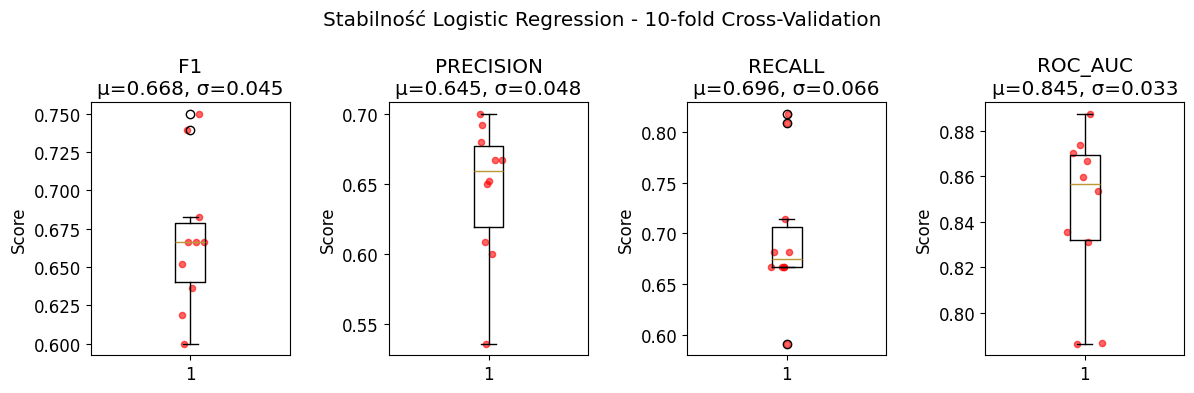

In [62]:

# Wizualizacja rozrzutu wyników CV
plt.figure(figsize=(12, 4))
metrics_to_plot = ['f1', 'precision', 'recall', 'roc_auc']

for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(1, 4, i)
    scores = cv_scores[metric]
    plt.boxplot(scores)
    plt.title(f'{metric.upper()}\nμ={np.mean(scores):.3f}, σ={np.std(scores):.3f}')
    plt.ylabel('Score')
    
    # Dodaj punkty
    x = np.random.normal(1, 0.04, size=len(scores))
    plt.scatter(x, scores, alpha=0.6, color='red', s=20)

plt.suptitle(f'Stabilność {best_model_name} - 10-fold Cross-Validation')
plt.tight_layout()
plt.show()


In [63]:

print(f"\n💡 INTERPRETACJA STABILNOŚCI:")
f1_std = np.std(cv_scores['f1'])
if f1_std < 0.05:
    print(f"  ✅ Model bardzo stabilny (std F1: {f1_std:.4f})")
    print(f"  • Można bezpiecznie wdrożyć do produkcji")
else:
    print(f"  ⚠️  Model niestabilny (std F1: {f1_std:.4f})")
    print(f"  • Rozważ więcej danych lub regularyzację")


💡 INTERPRETACJA STABILNOŚCI:
  ✅ Model bardzo stabilny (std F1: 0.0450)
  • Można bezpiecznie wdrożyć do produkcji


In [64]:
# 3. Learning Curves - czy potrzebujemy więcej danych?
print(f"\n\n📈 Krok 3: Analiza Learning Curves")

from sklearn.model_selection import learning_curve

# Generuj learning curves dla najlepszego modelu
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes_abs, train_scores, val_scores = learning_curve(
    best_model, X_train_scaled, y_train,
    train_sizes=train_sizes, cv=5, scoring='f1',
    n_jobs=-1, random_state=42
)

# Oblicz średnie i odchylenia
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)




📈 Krok 3: Analiza Learning Curves


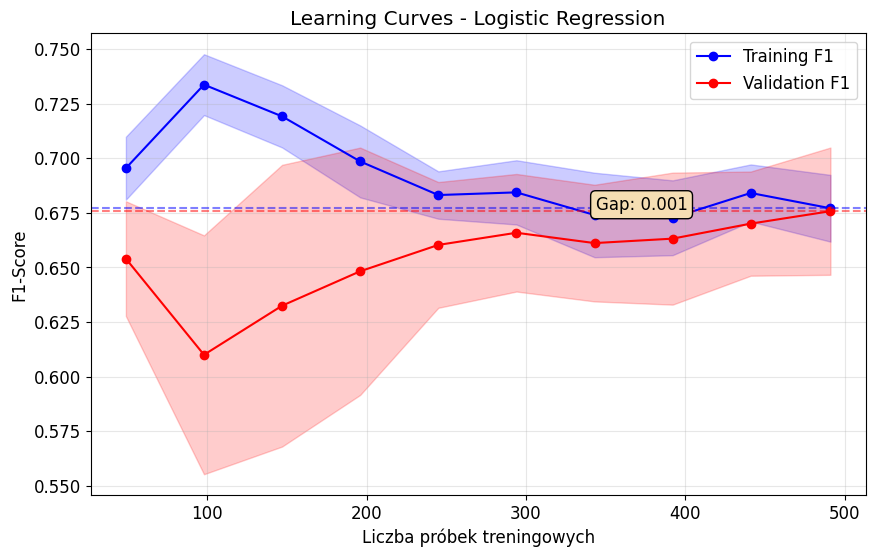


📊 Analiza Learning Curves:
  • Training F1: 0.6771 (±0.0153)
  • Validation F1: 0.6758 (±0.0292)
  • Gap (overfit): 0.0013


In [65]:

# Wizualizacja
plt.figure(figsize=(10, 6))
plt.plot(train_sizes_abs, train_mean, 'o-', color='blue', label='Training F1')
plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

plt.plot(train_sizes_abs, val_mean, 'o-', color='red', label='Validation F1')
plt.fill_between(train_sizes_abs, val_mean - val_std, val_mean + val_std, alpha=0.2, color='red')

plt.xlabel('Liczba próbek treningowych')
plt.ylabel('F1-Score')
plt.title(f'Learning Curves - {best_model_name}')
plt.legend()
plt.grid(True, alpha=0.3)

# Analiza gapów
final_gap = train_mean[-1] - val_mean[-1]
plt.axhline(y=val_mean[-1], color='red', linestyle='--', alpha=0.5)
plt.axhline(y=train_mean[-1], color='blue', linestyle='--', alpha=0.5)
plt.text(train_sizes_abs[-1]*0.7, (train_mean[-1] + val_mean[-1])/2, 
         f'Gap: {final_gap:.3f}', fontsize=12, bbox=dict(boxstyle="round", facecolor='wheat'))

plt.show()

print(f"\n📊 Analiza Learning Curves:")
print(f"  • Training F1: {train_mean[-1]:.4f} (±{train_std[-1]:.4f})")
print(f"  • Validation F1: {val_mean[-1]:.4f} (±{val_std[-1]:.4f})")
print(f"  • Gap (overfit): {final_gap:.4f}")


In [66]:
if final_gap < 0.05:
    print(f"  ✅ Brak overfittingu - model dobrze generalizuje")
elif final_gap < 0.1:
    print(f"  ⚠️  Lekki overfitting - do akceptacji")
else:
    print(f"  😨 Poważny overfitting - potrzebna regularyzacja")

# Sprawdzenie trendu validation score
val_trend = val_mean[-1] - val_mean[-3]  # Porównaj ostatnie z 3 od końca
if val_trend > 0.01:
    print(f"  📈 Validation score rośnie - więcej danych może pomóc!")
else:
    print(f"  📊 Validation score stabilny - prawdopodobnie wystarczająco danych")

print(f"\n\n" + "=" * 60)


  ✅ Brak overfittingu - model dobrze generalizuje
  📈 Validation score rośnie - więcej danych może pomóc!




In [82]:



print(f"\n🏆 WYBRANY MODEL: {best_model_name}")
print(f"   • F1-Score: {best_f1_score:.4f}")
print(f"   • ROC-AUC: {lr_metrics['roc_auc'] if not best_model_name.startswith('KNN') else knn_metrics['roc_auc']:.4f}")
print(f"   • Stabilność: {f1_std:.4f} (CV std)")



print(f"\n⚠️  UWAGI I OGRANICZENIA:")
print(f"  • Model oparty na kobietach Pima Indian - może nie generalizować na inne populacje")
print(f"  • Wymaga standaryzacji danych wejściowych")
print(f"  • Nie zastąpi diagnozy lekarskiej - tylko wspomaga")
print(f"  • Regularne aktualizacje modelu zalecane")


print(f"\n🎉 ANALIZA KOMPLETNA! Model gotowy do wdrożenia w systemie szpitalnym.")
print(f"\u2728 Dziękuję za uwagę i pomyślne modelowanie! 🚀")


🏆 WYBRANY MODEL: Logistic Regression
   • F1-Score: 0.6154
   • ROC-AUC: 0.8104
   • Stabilność: 0.0450 (CV std)

⚠️  UWAGI I OGRANICZENIA:
  • Model oparty na kobietach Pima Indian - może nie generalizować na inne populacje
  • Wymaga standaryzacji danych wejściowych
  • Nie zastąpi diagnozy lekarskiej - tylko wspomaga
  • Regularne aktualizacje modelu zalecane

🎉 ANALIZA KOMPLETNA! Model gotowy do wdrożenia w systemie szpitalnym.
✨ Dziękuję za uwagę i pomyślne modelowanie! 🚀


# **🎉 Podsumowanie i Wnioski**

## **📚 Co przećwiczyliśmy?**

W tym notebooku poznałeś w pełni **dwa kluczowe algorytmy klasyfikacji**:

### **🔵 K-Nearest Neighbors (KNN)**
✅ **Opanowałeś:**
- 🎯 Zasadę działania algorytmu "leniwego uczenia"
- 📏 Wpływ metryki odległości i skalowania cech
- ⚙️ Dobór hiperparametru $k$ i techniki tuningu
- 🎪 Modelowanie złożonych, nieliniowych granic decyzyjnych

### **🟡 Regresja Logistyczna**
✅ **Opanowałeś:**
- 📊 Funkcję sigmoidalną i modelowanie prawdopodobieństw
- 🔍 Interpretację współczynników i znaczenie biznesowe
- ⚖️ Regularyzację L1/L2 i kontrolę overfittingu
- 🚀 Szybki i interpretowalny model liniowy



### **📊 Ewaluacja Modeli**
✅ **Opanowałeś:**
- 🎯 Kluczowe metryki: accuracy, precision, recall, F1, ROC-AUC
- 📈 Macierz konfuzji i analizę błędów
- ⚖️ Precision-Recall tradeoff i wybór progu decyzyjnego
- 🎪 Wybór metryki według kontekstu biznesowego


## **🛠️ Praktyczne umiejętności**

### **🔧 Workflow ML**
- 🔍 **EDA:** Eksploracja i rozumienie danych medycznych
- 🧹 **Preprocessing:** Obsługa braków, skalowanie, podział danych
- 🎯 **Modeling:** Baseline models, tunning, porównanie algorytmów
- 📊 **Evaluation:** Kompleksowa ocena i interpretacja wyników

### **💡 Best Practices**
- ⚠️ **Unikanie data leakage** w procesie skalowania
- 🎯 **Strategified splitting** dla niezbalansowanych klas
- 🔄 **Cross-validation** do rzetelnej oceny modeli
- 🏥 **Business context** w wyborze metryk i interpretacji



## **🎯 Kluczowe wnioski**

**Dla predykcji cukrzycy u pacjentek:**
- 🩺 **Glucose i BMI** to najważniejsze predyktory (high coefficients w LR)
- 👵 **Wiek i liczba ciąż** znacząco wpływają na ryzyko
- 🧬 **Predyspozycje genetyczne** (DiabetesPedigreeFunction) kluczowe
- ⚕️ **Model może wspierać lekarzy** w identyfikacji pacjentek wysokiego ryzyka




## **🎓 Zadanie domowe (opcjonalne)**

**Spróbuj samodzielnie:**
1. 🔄 **Zastosuj inne algorytmy** (Random Forest, SVM - omówione na następnych zajęciach) i porównaj wyniki
2. 🎯 **Feature engineering** - stwórz nowe cechy (np. BMI categories, age groups)
3. ⚖️ **Balancing techniques** - wypróbuj SMOTE lub class weights (cost sensitive training)
4. 📊 **Advanced evaluation** - ROC curves, Precision-Recall curves
5.  🛠️ **Pipeline** – zaimplementuj powyższy przykład z użyciem obiektu Pipeline z biblioteki scikit‑learn, łącząc w jednym obiekcie wszystkie kroki przetwarzania wstępnego (np. standaryzację, kodowanie cech) oraz modelowanie (np. regresję logistyczną).

**💡 Pamiętaj:** Najlepszy model to nie zawsze ten z najwyższą accuracy - liczy się wartość biznesowa i praktyczność wdrożenia!
